# Problem Statement:
- Whether the client has subscribed a term deposit or not 

# Import all the necessary liabiries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
import warnings
warnings.filterwarnings ("ignore")
%matplotlib inline

# Attribute information For bank dataset

   ***Input variables:
   # bank client data:
   1 - age (numeric)
   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services") 
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
   4 - education (categorical: "unknown","secondary","primary","tertiary")
   5 - default: has credit in default? (binary: "yes","no")
   6 - balance: average yearly balance, in euros (numeric) 
   7 - housing: has housing loan? (binary: "yes","no")
   8 - loan: has personal loan? (binary: "yes","no")
   # related with the last contact of the current campaign:
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
  10 - day: last contact day of the month (numeric)
  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  12 - duration: last contact duration, in seconds (numeric)
   # other attributes:
  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
  15 - previous: number of contacts performed before this campaign and for this client (numeric)
  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

  Output variable (desired target):
  17 - y - has the client subscribed a term deposit? (binary: "yes","no")

8. Missing Attribute Values: None***

# Read the data set

In [3]:
raw_dataset = pd.read_csv("bank-full.csv", sep=';')
raw_dataset

age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome    y  
0        unknown    5   may       261         1     -1         0  unknown   no  
1        unknown    5   may       151         1     -1         0  unknown   no  
2        unknown    5   may        76         1     -1         0  unknown   no  
3        unknown    5   may        92         1     -1         0  unknown   no  
4        unknown    5   may       198         1     -1         0  unknown   no  
...          ...  ...   ...       ...       ...    ...       ...      ...  ...  
45206   cellular   17   nov       977         3     -1         0  unknown  yes  
45207   cellular   17   nov       456         2     -1         0  unknown  yes  
45208   cellular   17   nov      1127         5    184         3  success  yes  
45209  telephone   17   nov       508         4     -1         0  unknown   no  
45210   cellular   17   nov       361         2    188        11    other   no  

[45211 rows x 17 columns]

In [4]:
raw_dataset.describe()

age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.000000  
max      871.000000    275.000000

In [5]:
raw_dataset.describe(include=object)

job  marital  education default housing   loan   contact  \
count         45211    45211      45211   45211   45211  45211     45211   
unique           12        3          4       2       2      2         3   
top     blue-collar  married  secondary      no     yes     no  cellular   
freq           9732    27214      23202   44396   25130  37967     29285   

        month poutcome      y  
count   45211    45211  45211  
unique     12        4      2  
top       may  unknown     no  
freq    13766    36959  39922

In [6]:
raw_dataset.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [7]:
raw_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [8]:
raw_dataset.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [9]:
raw_dataset.duplicated().sum()

0

<Axes: >

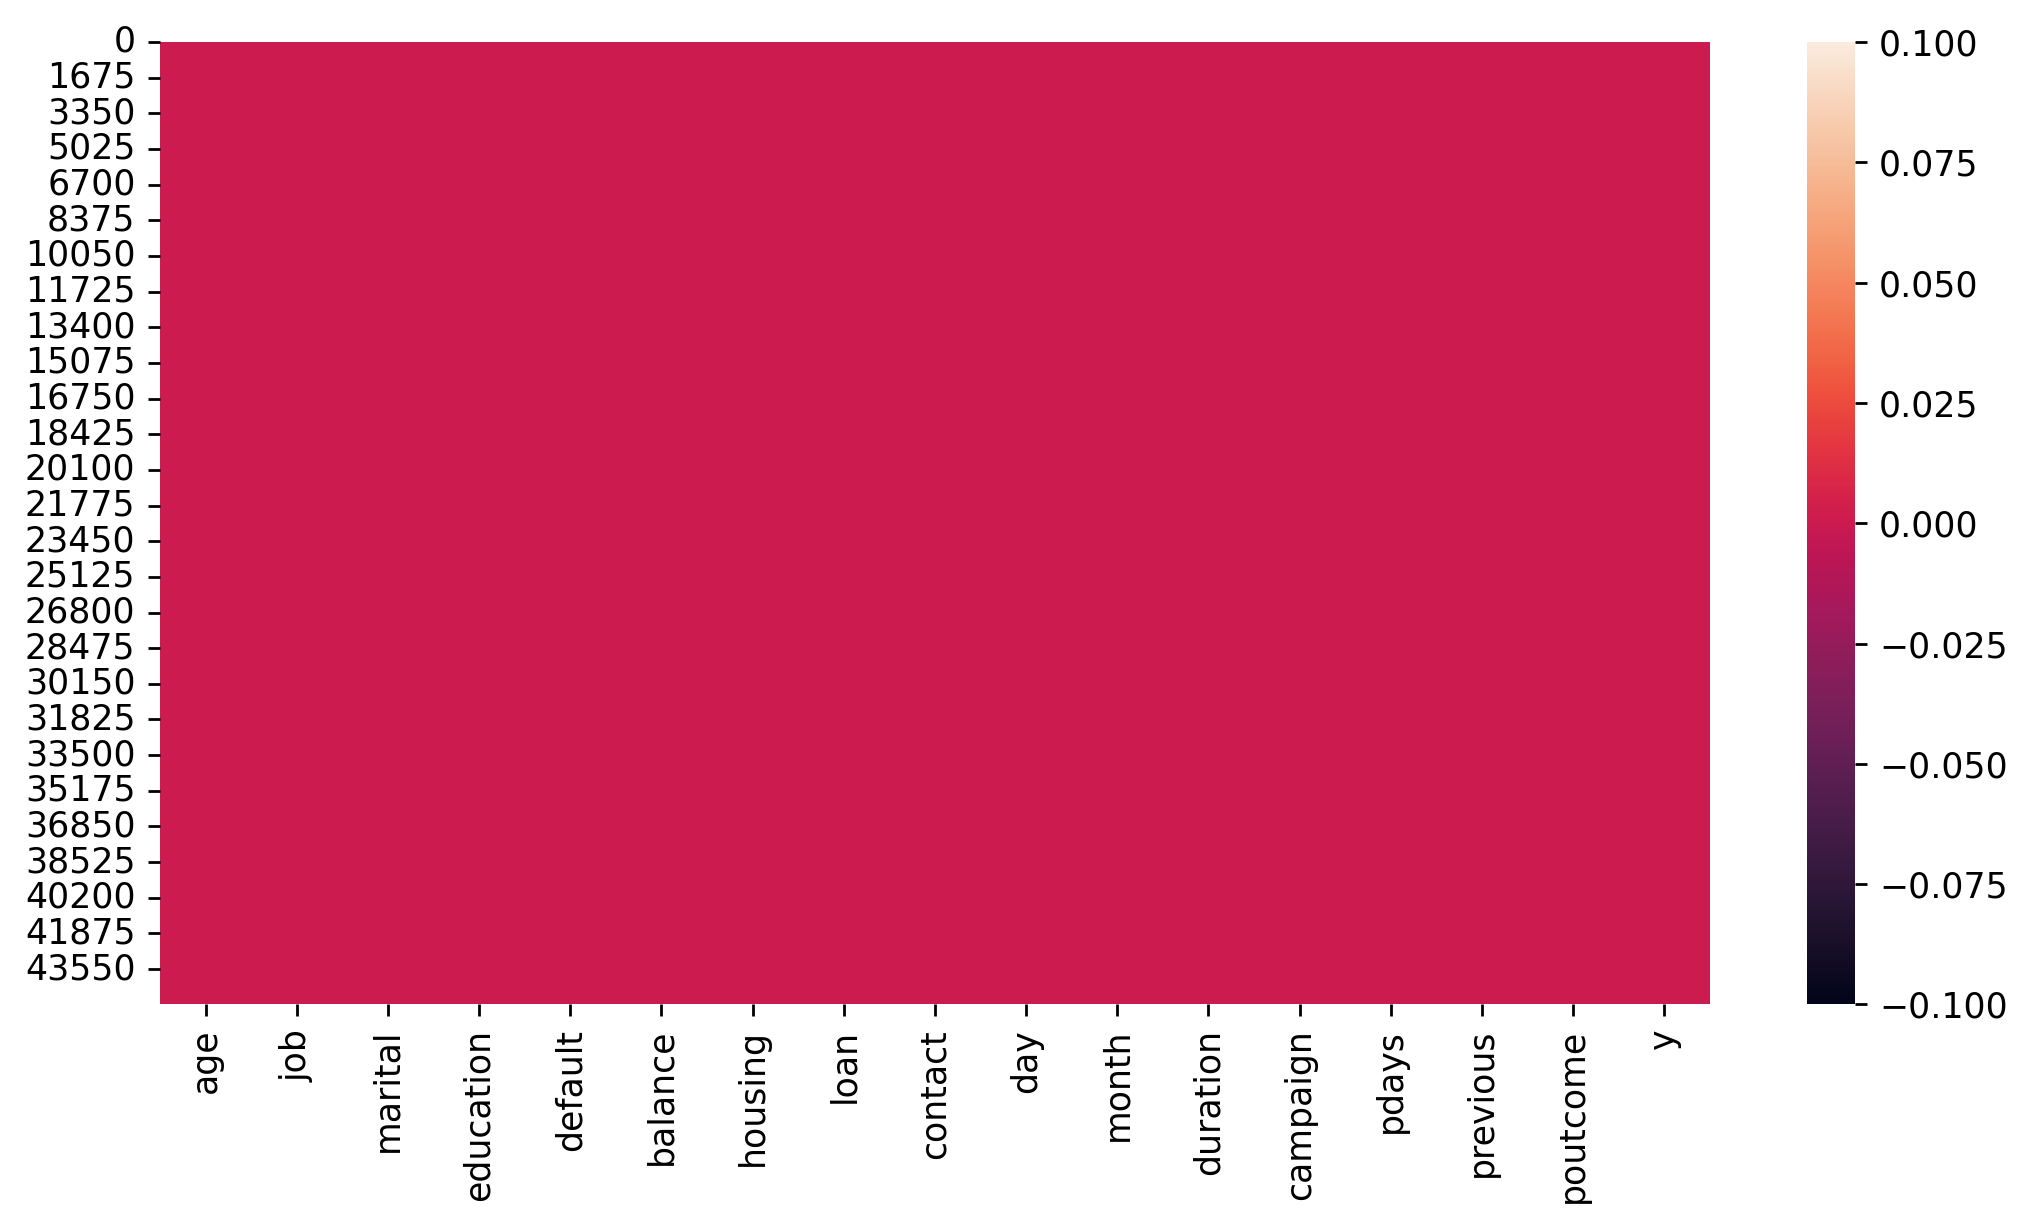

In [10]:
sns.heatmap(raw_dataset.isnull())

# Outlier detection

- There are multiple approaches to detect outliers in the dataset.
    - Histogram
    - Boxplot
    - Descriptive stats for df

In [11]:
raw_dataset.describe()

age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.000000  
max      871.000000    275.000000

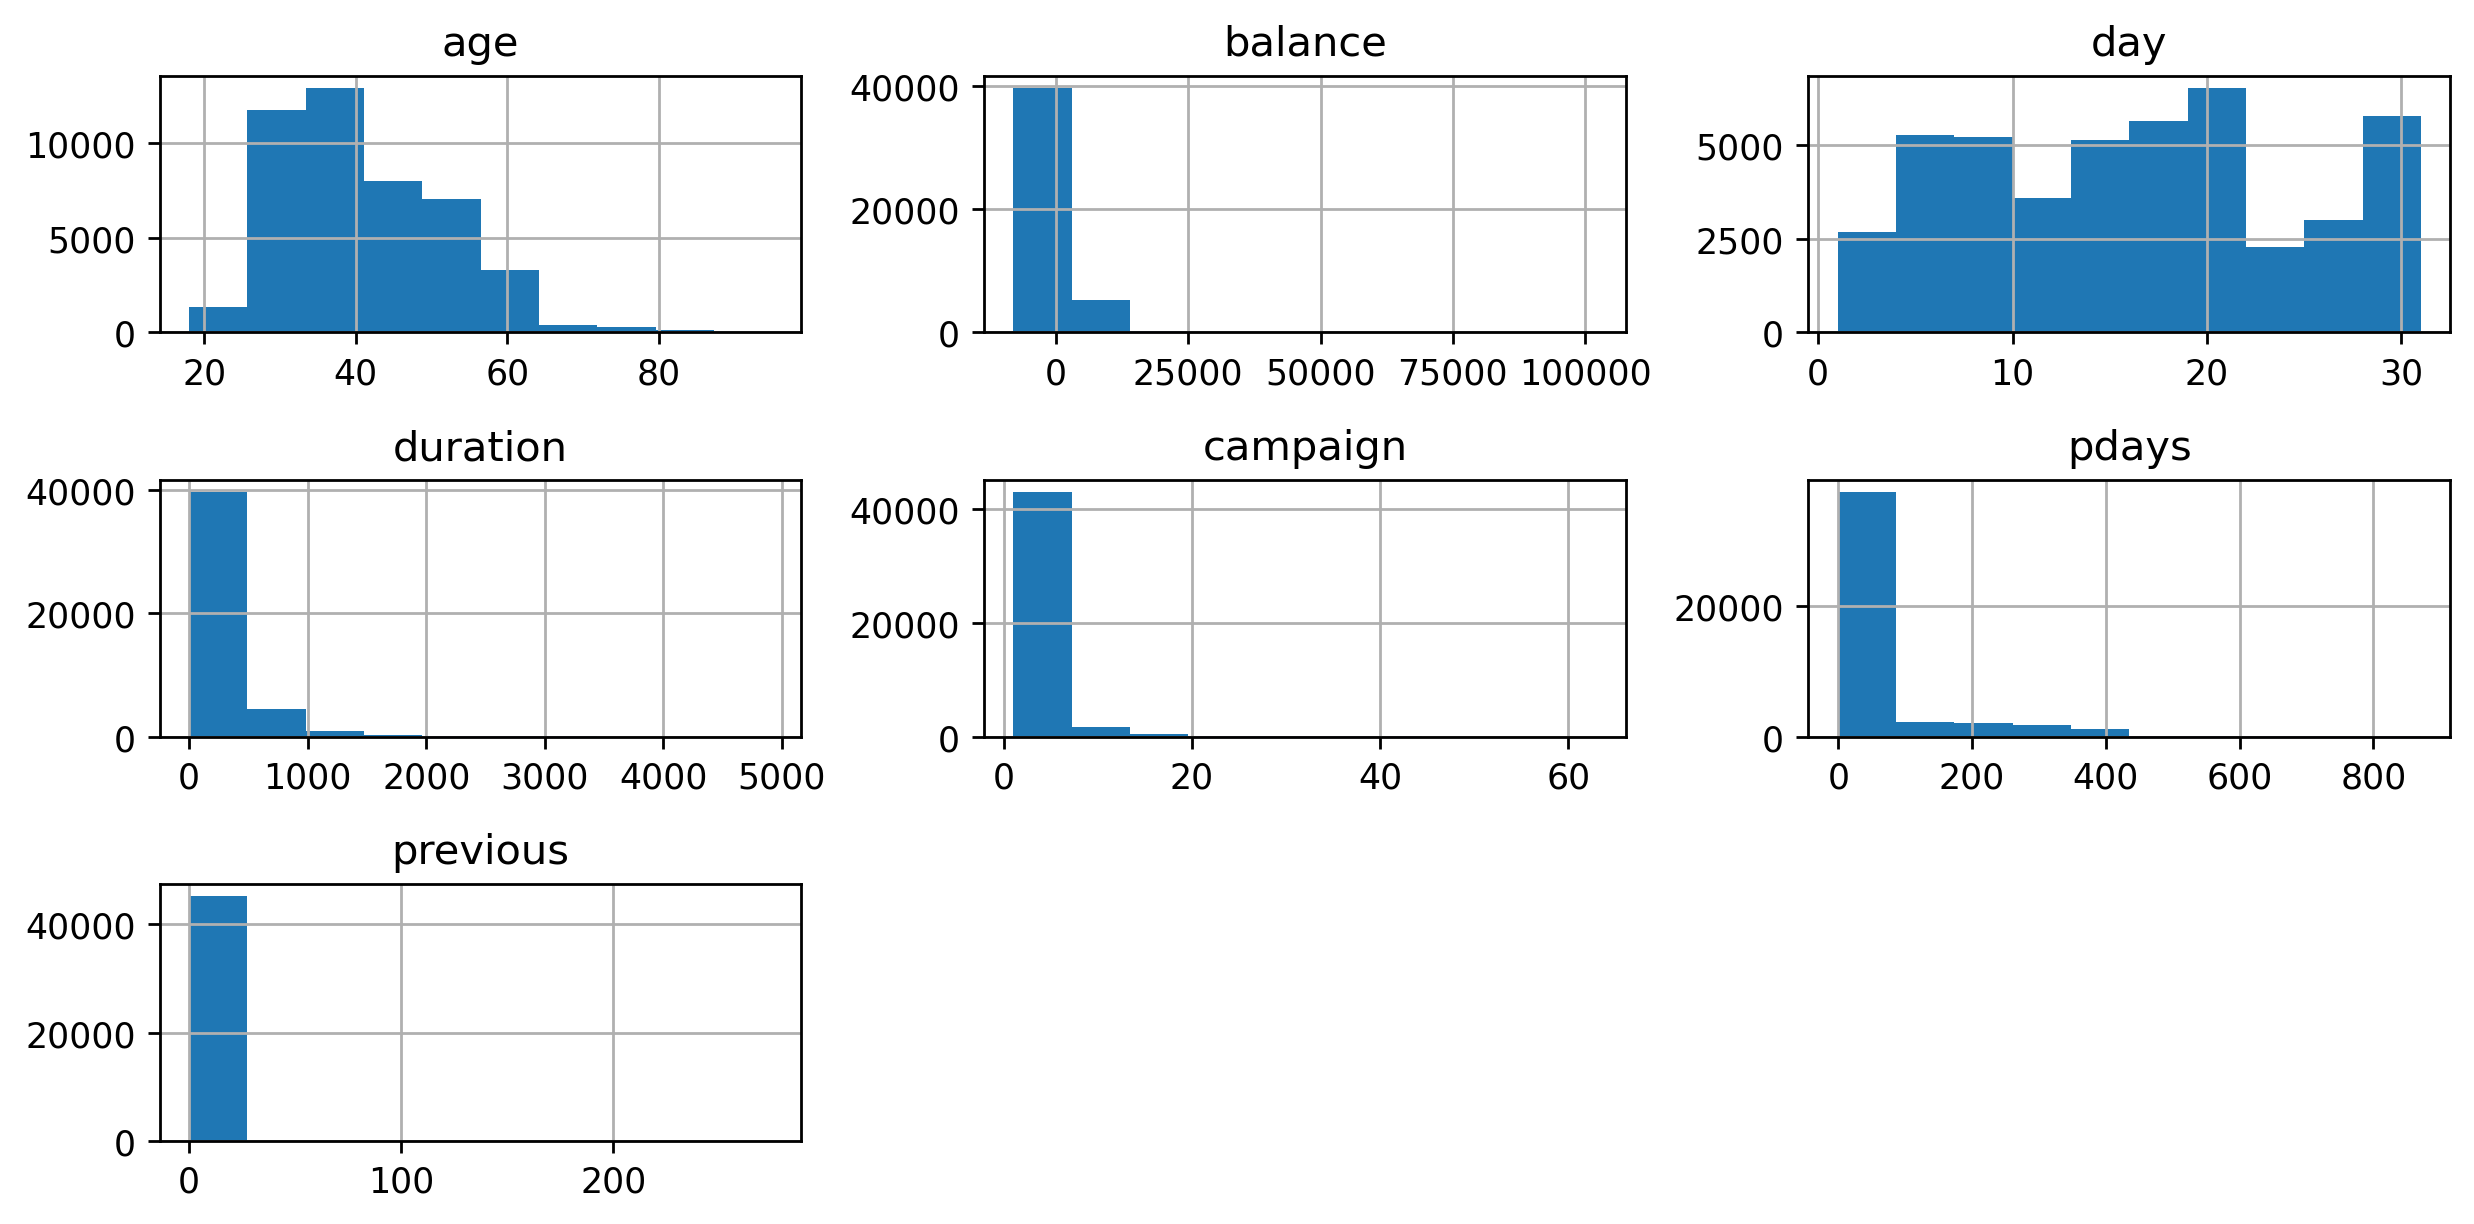

In [12]:
raw_dataset.hist()
plt.tight_layout()

<Axes: >

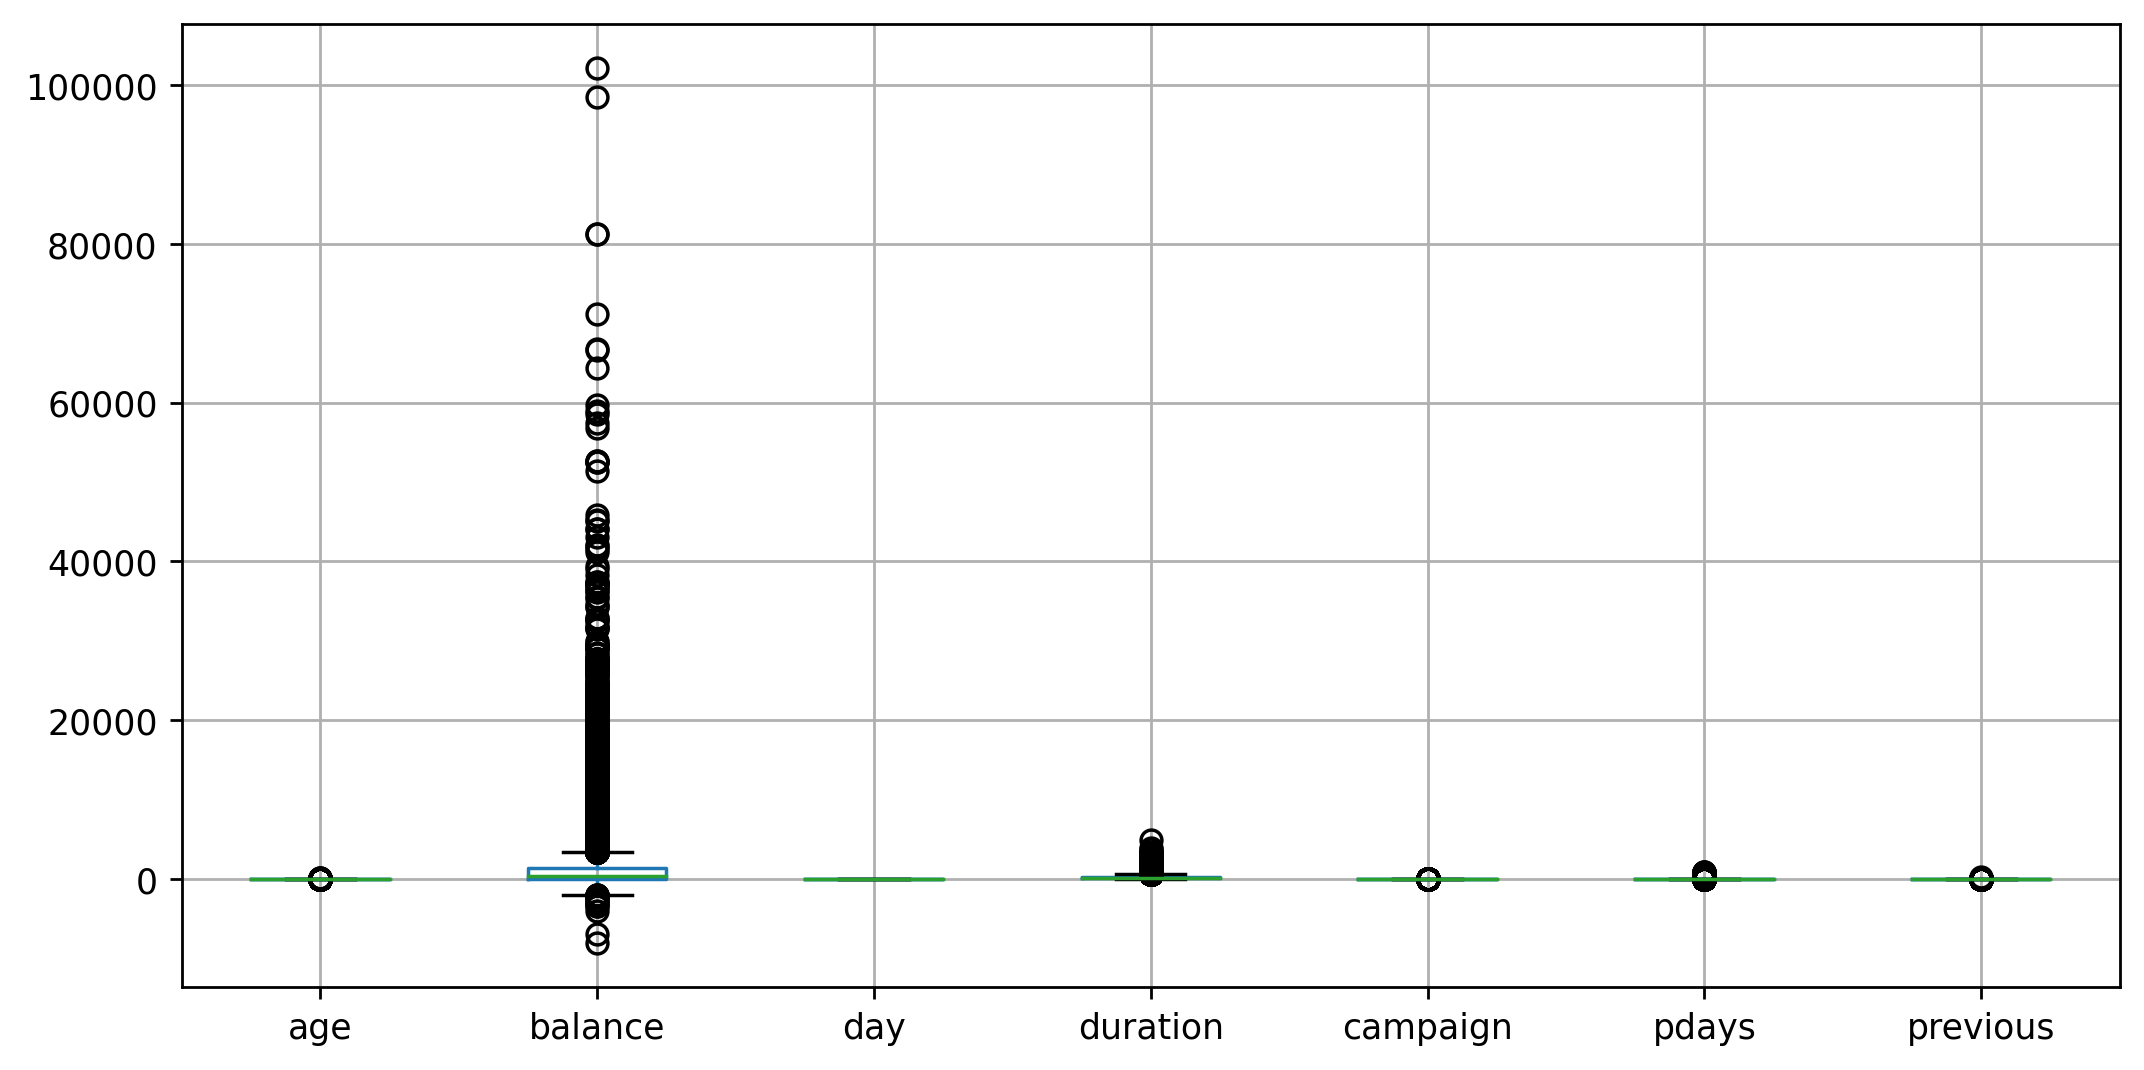

In [13]:
raw_dataset.boxplot()

# Ploting the data to check for the outliers.

Text(0.5, 1.0, 'age')

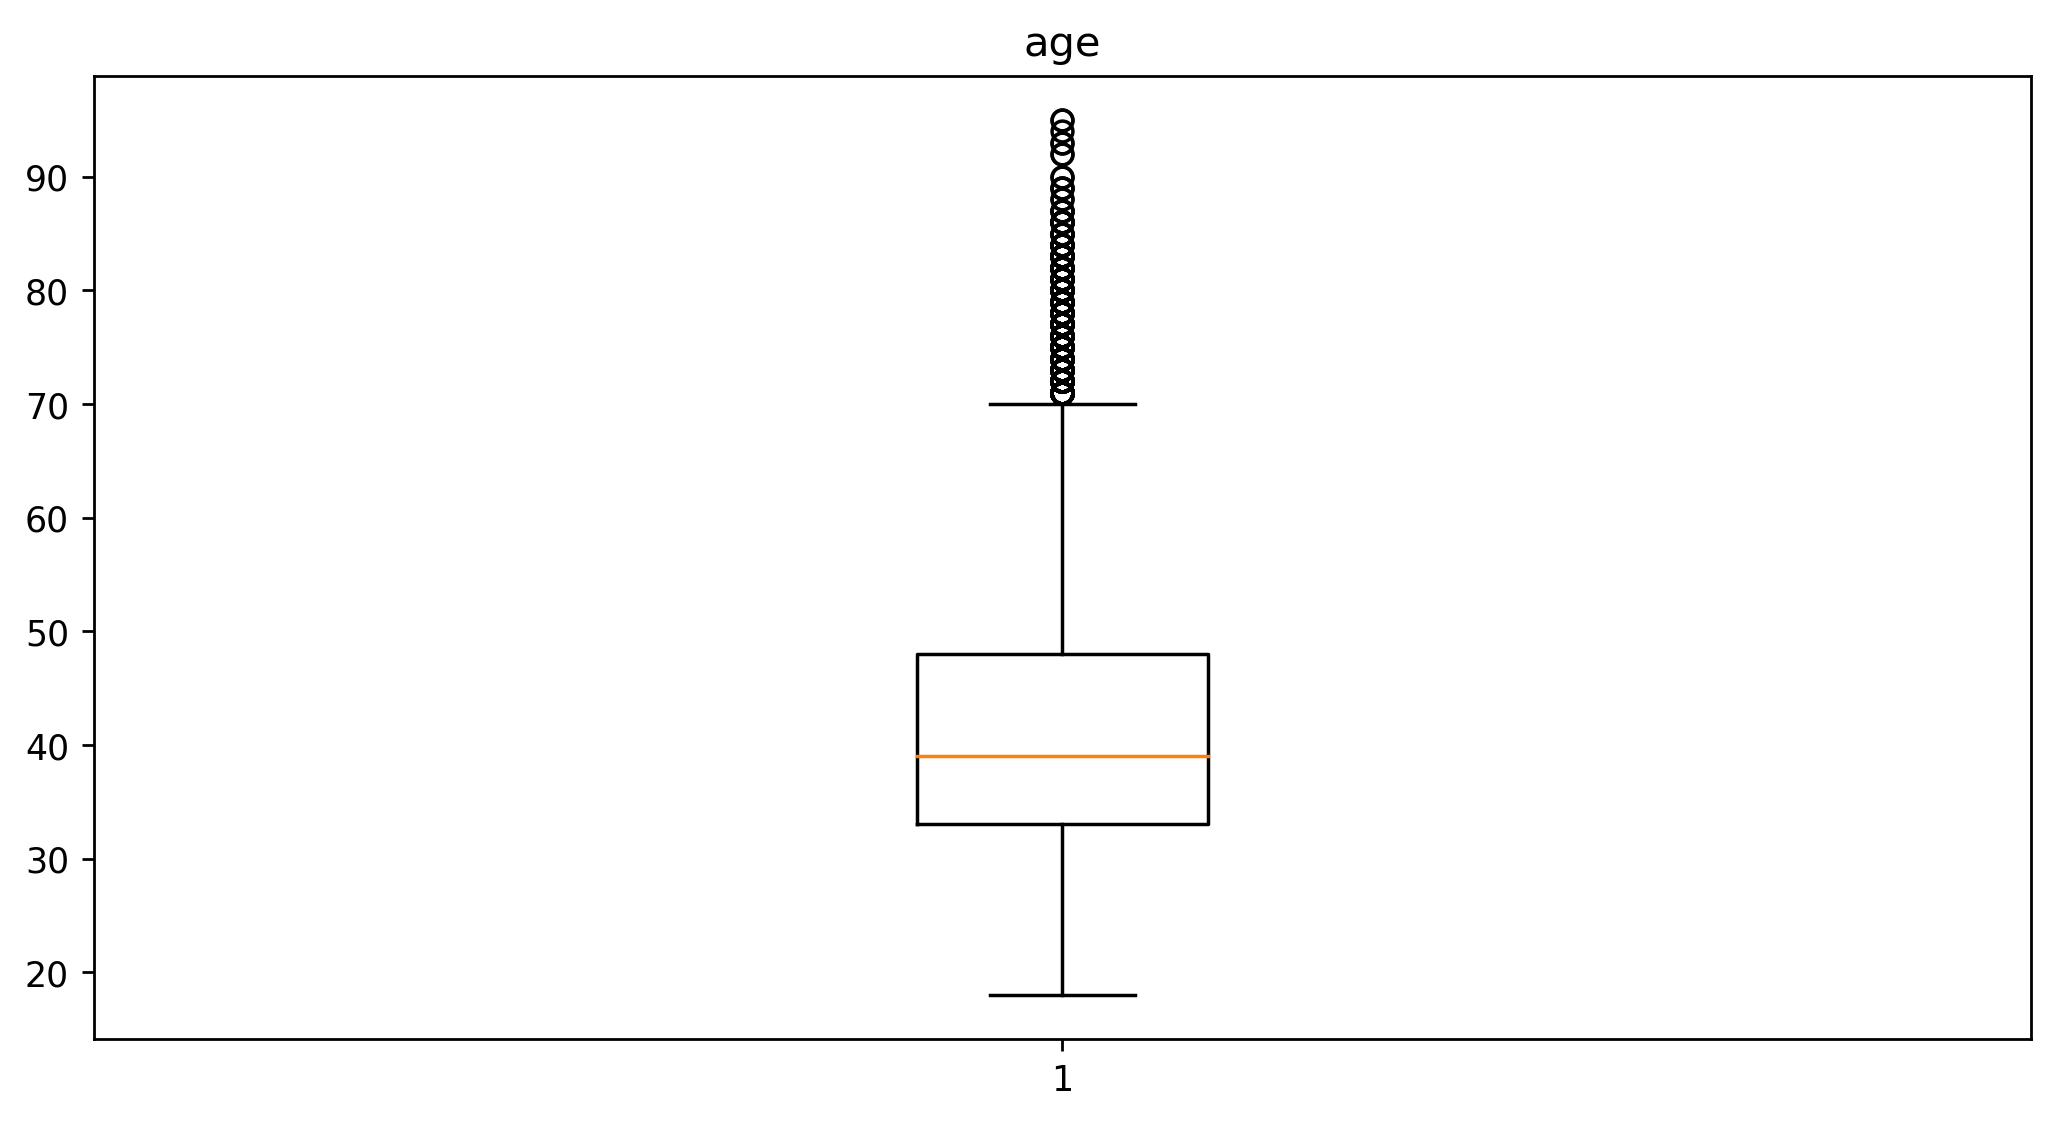

In [14]:
plt.subplot(1,1,1)
plt.boxplot(raw_dataset["age"])
plt.title("age")

Text(0.5, 1.0, 'balance')

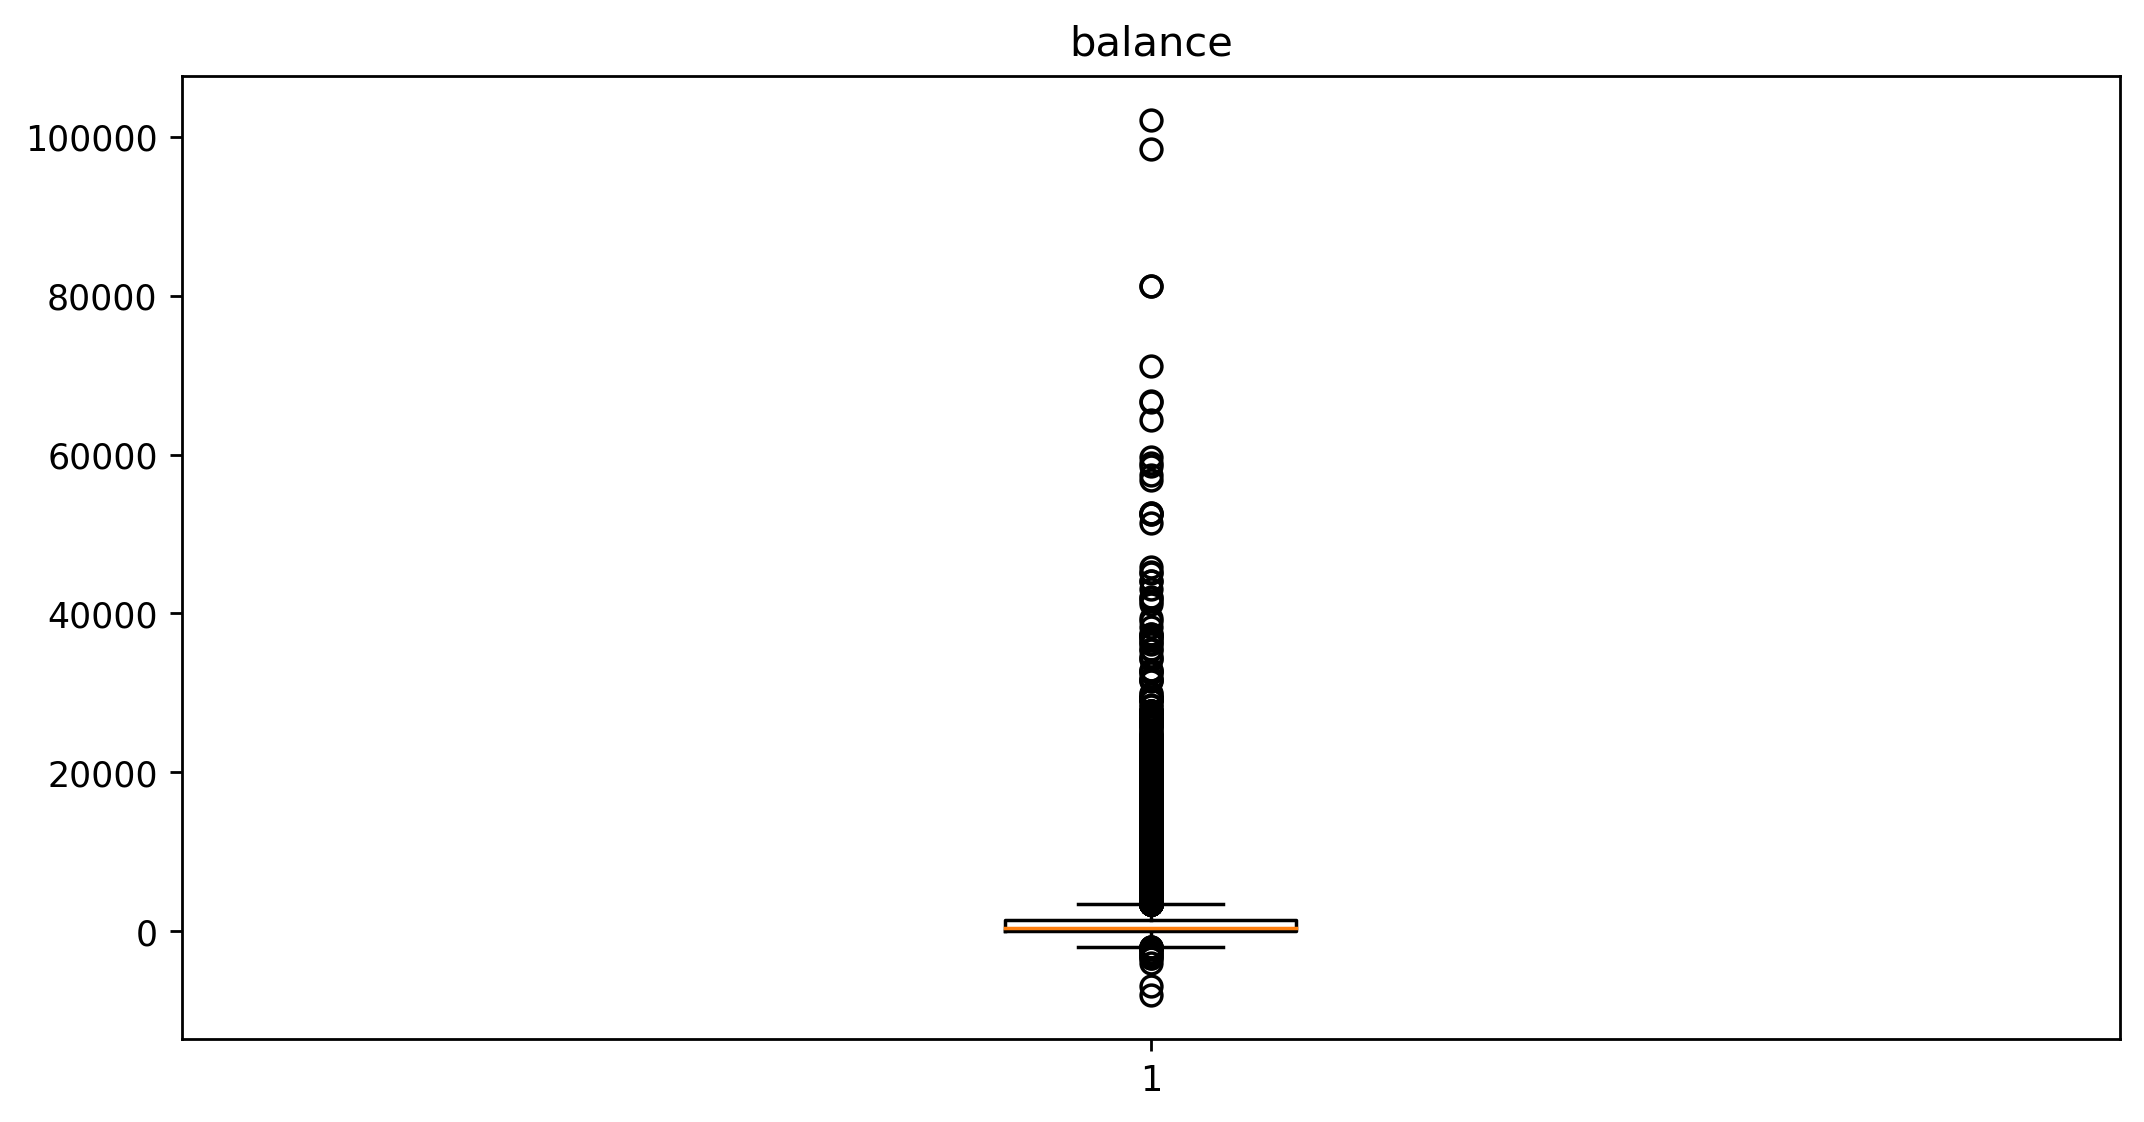

In [15]:
plt.subplot(1,1,1)
plt.boxplot(raw_dataset["balance"])
plt.title("balance")

Text(0.5, 1.0, 'day')

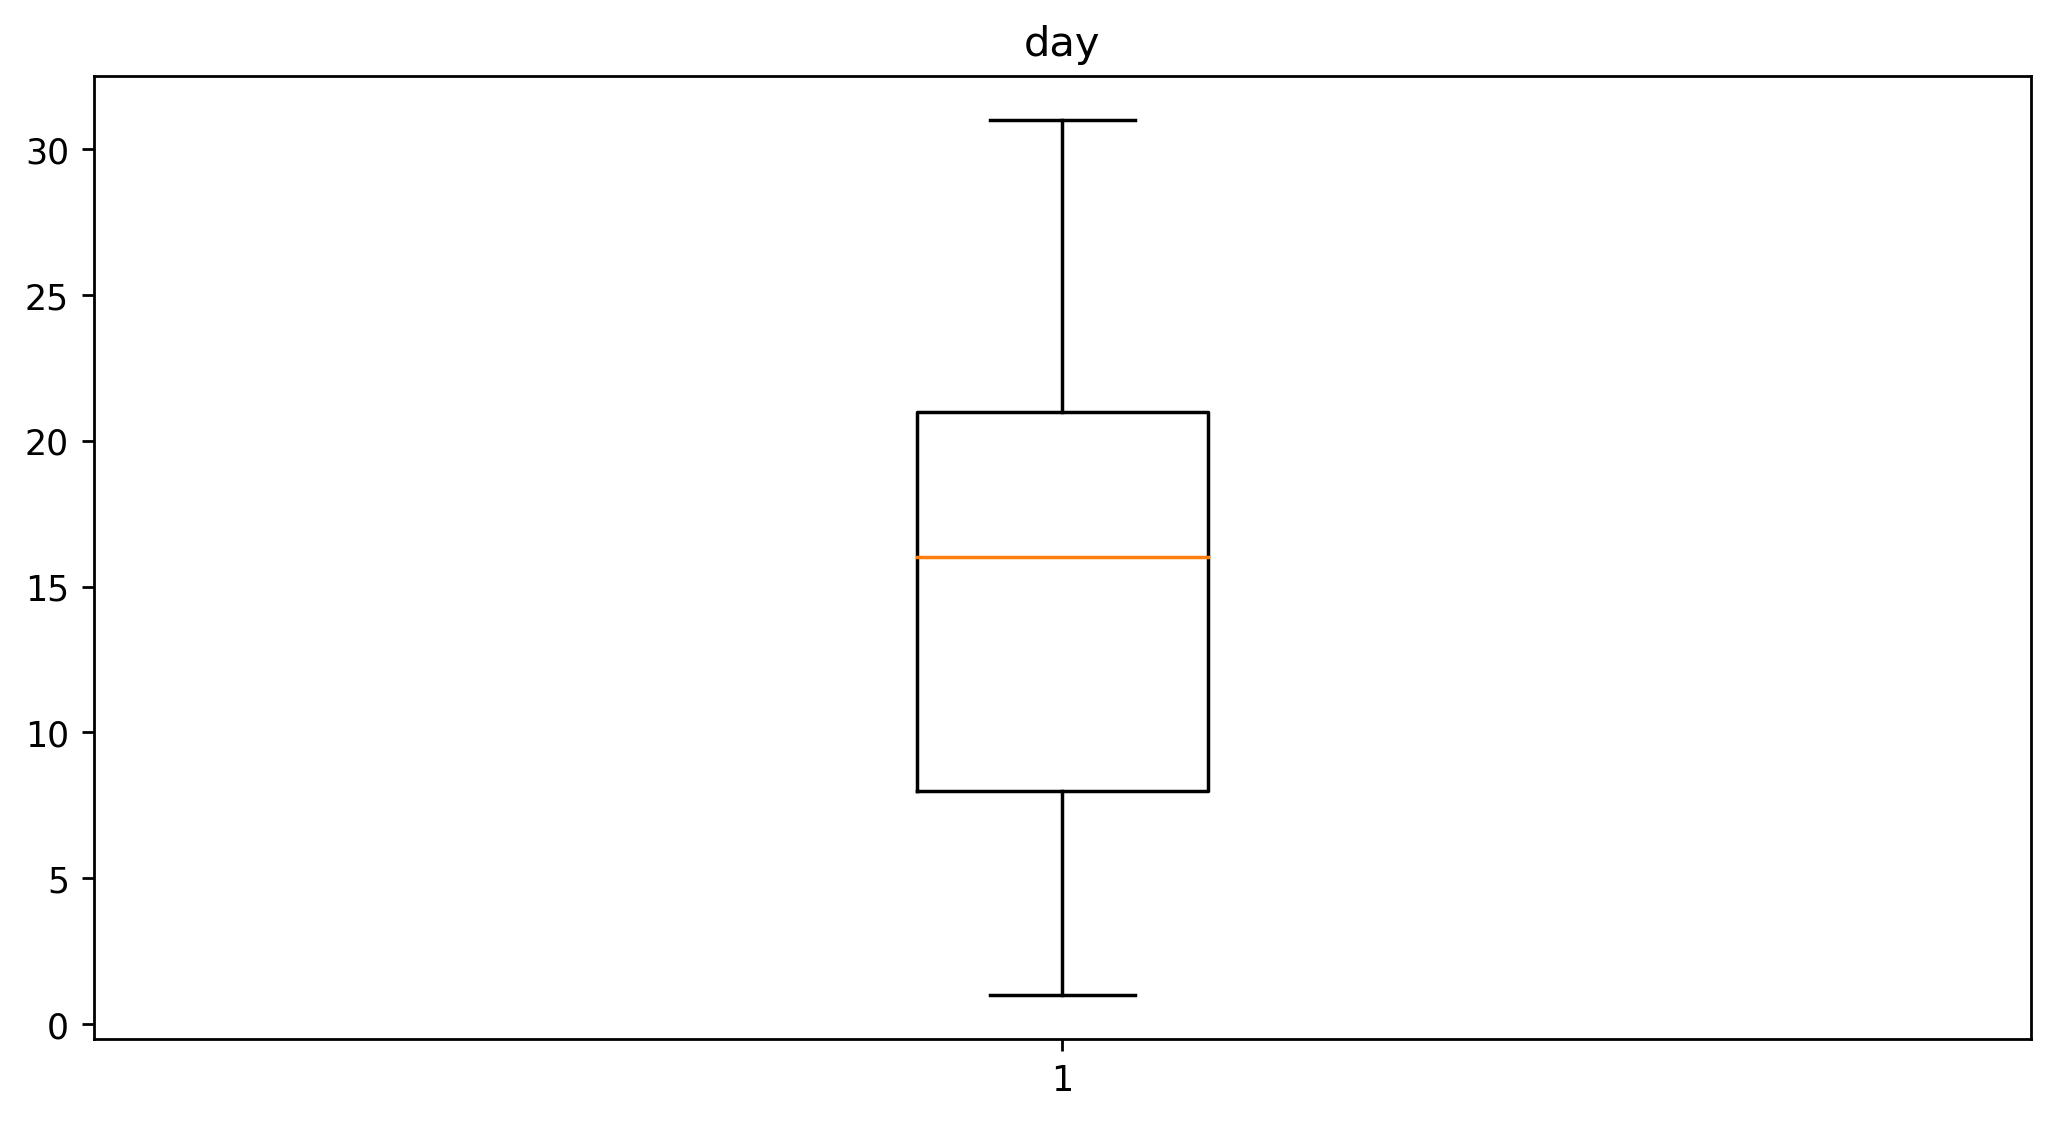

In [16]:
plt.subplot(1,1,1)
plt.boxplot(raw_dataset["day"])
plt.title("day")

Text(0.5, 1.0, 'duration')

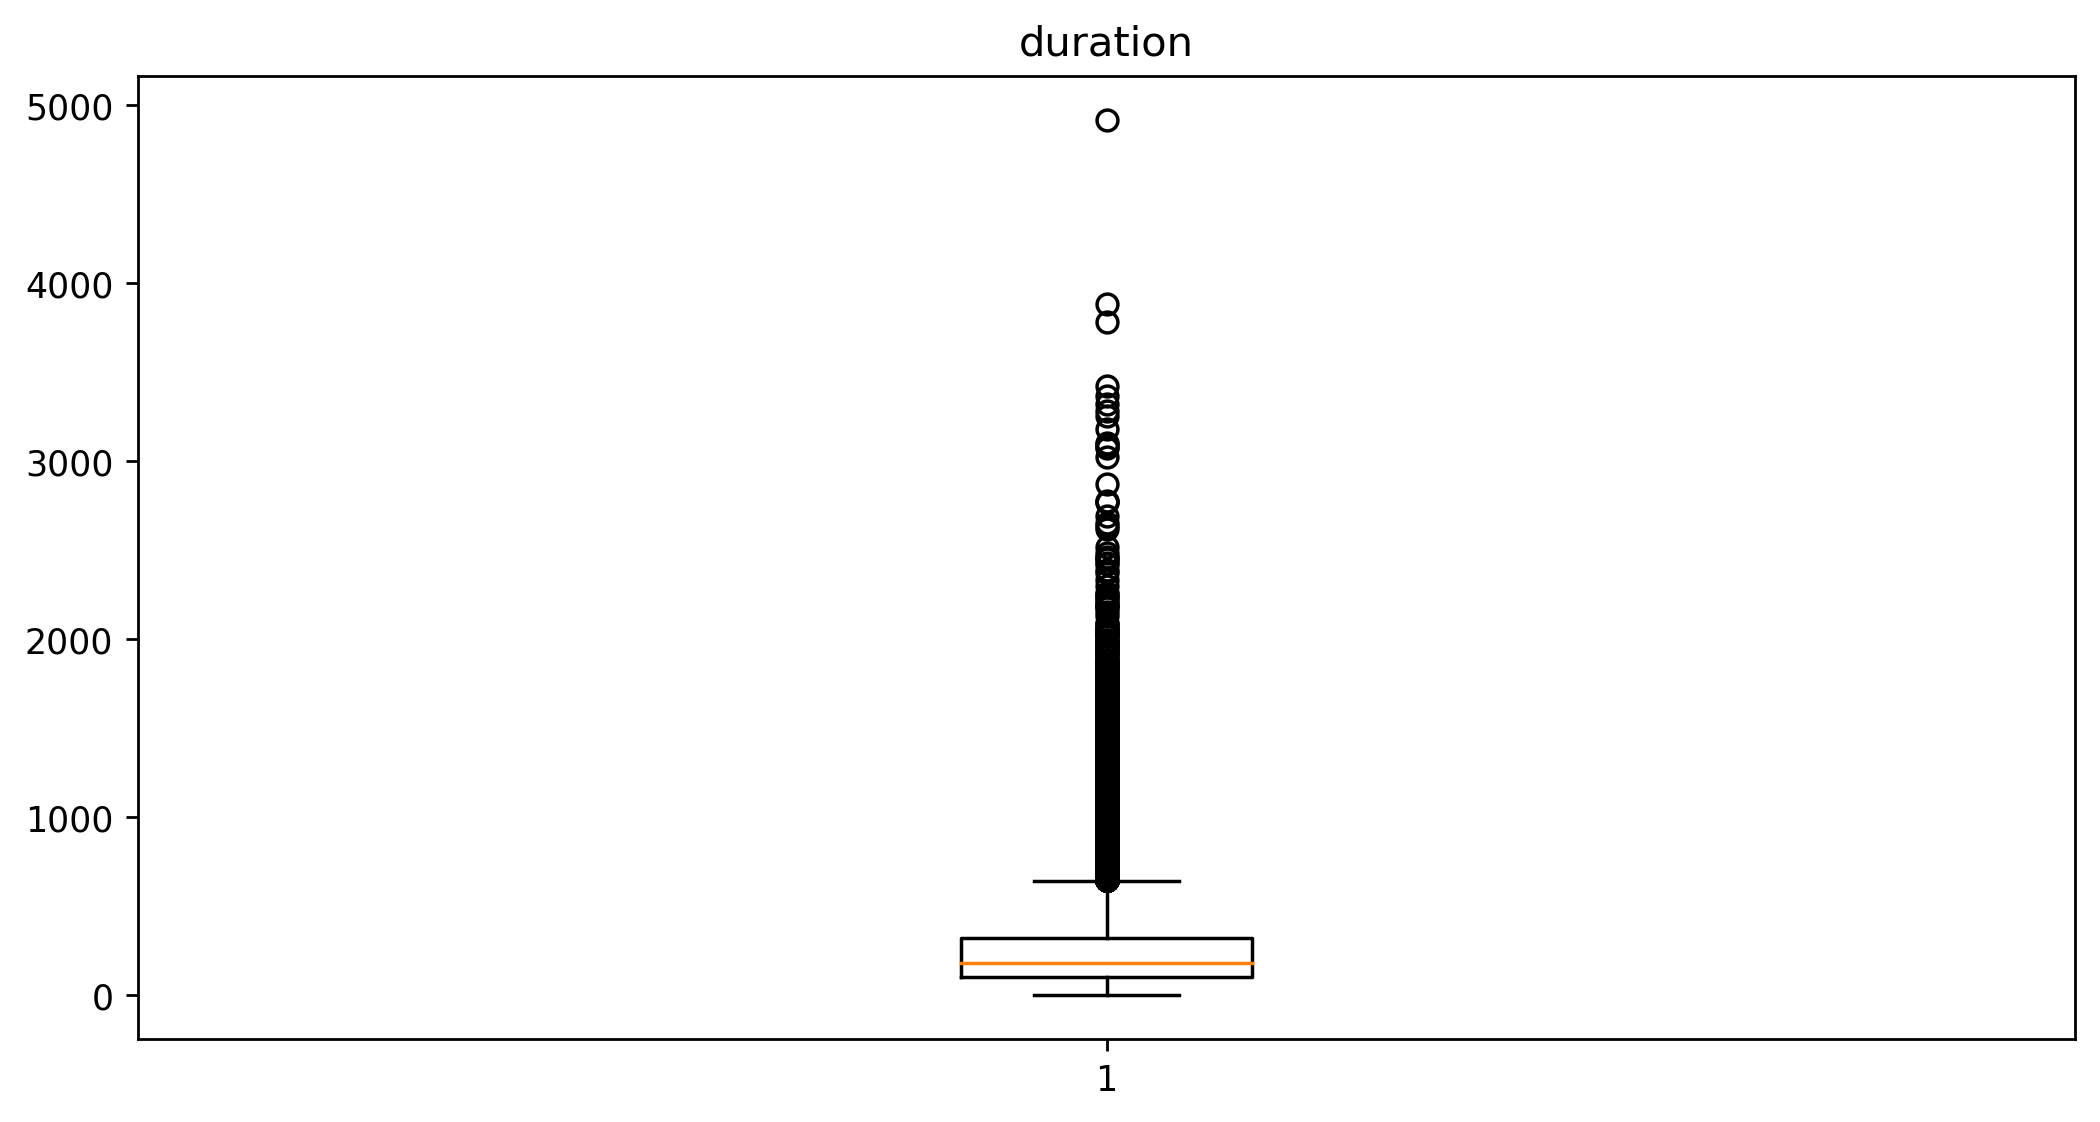

In [17]:
plt.subplot(1,1,1)
plt.boxplot(raw_dataset["duration"])
plt.title("duration")

Text(0.5, 1.0, 'campaign')

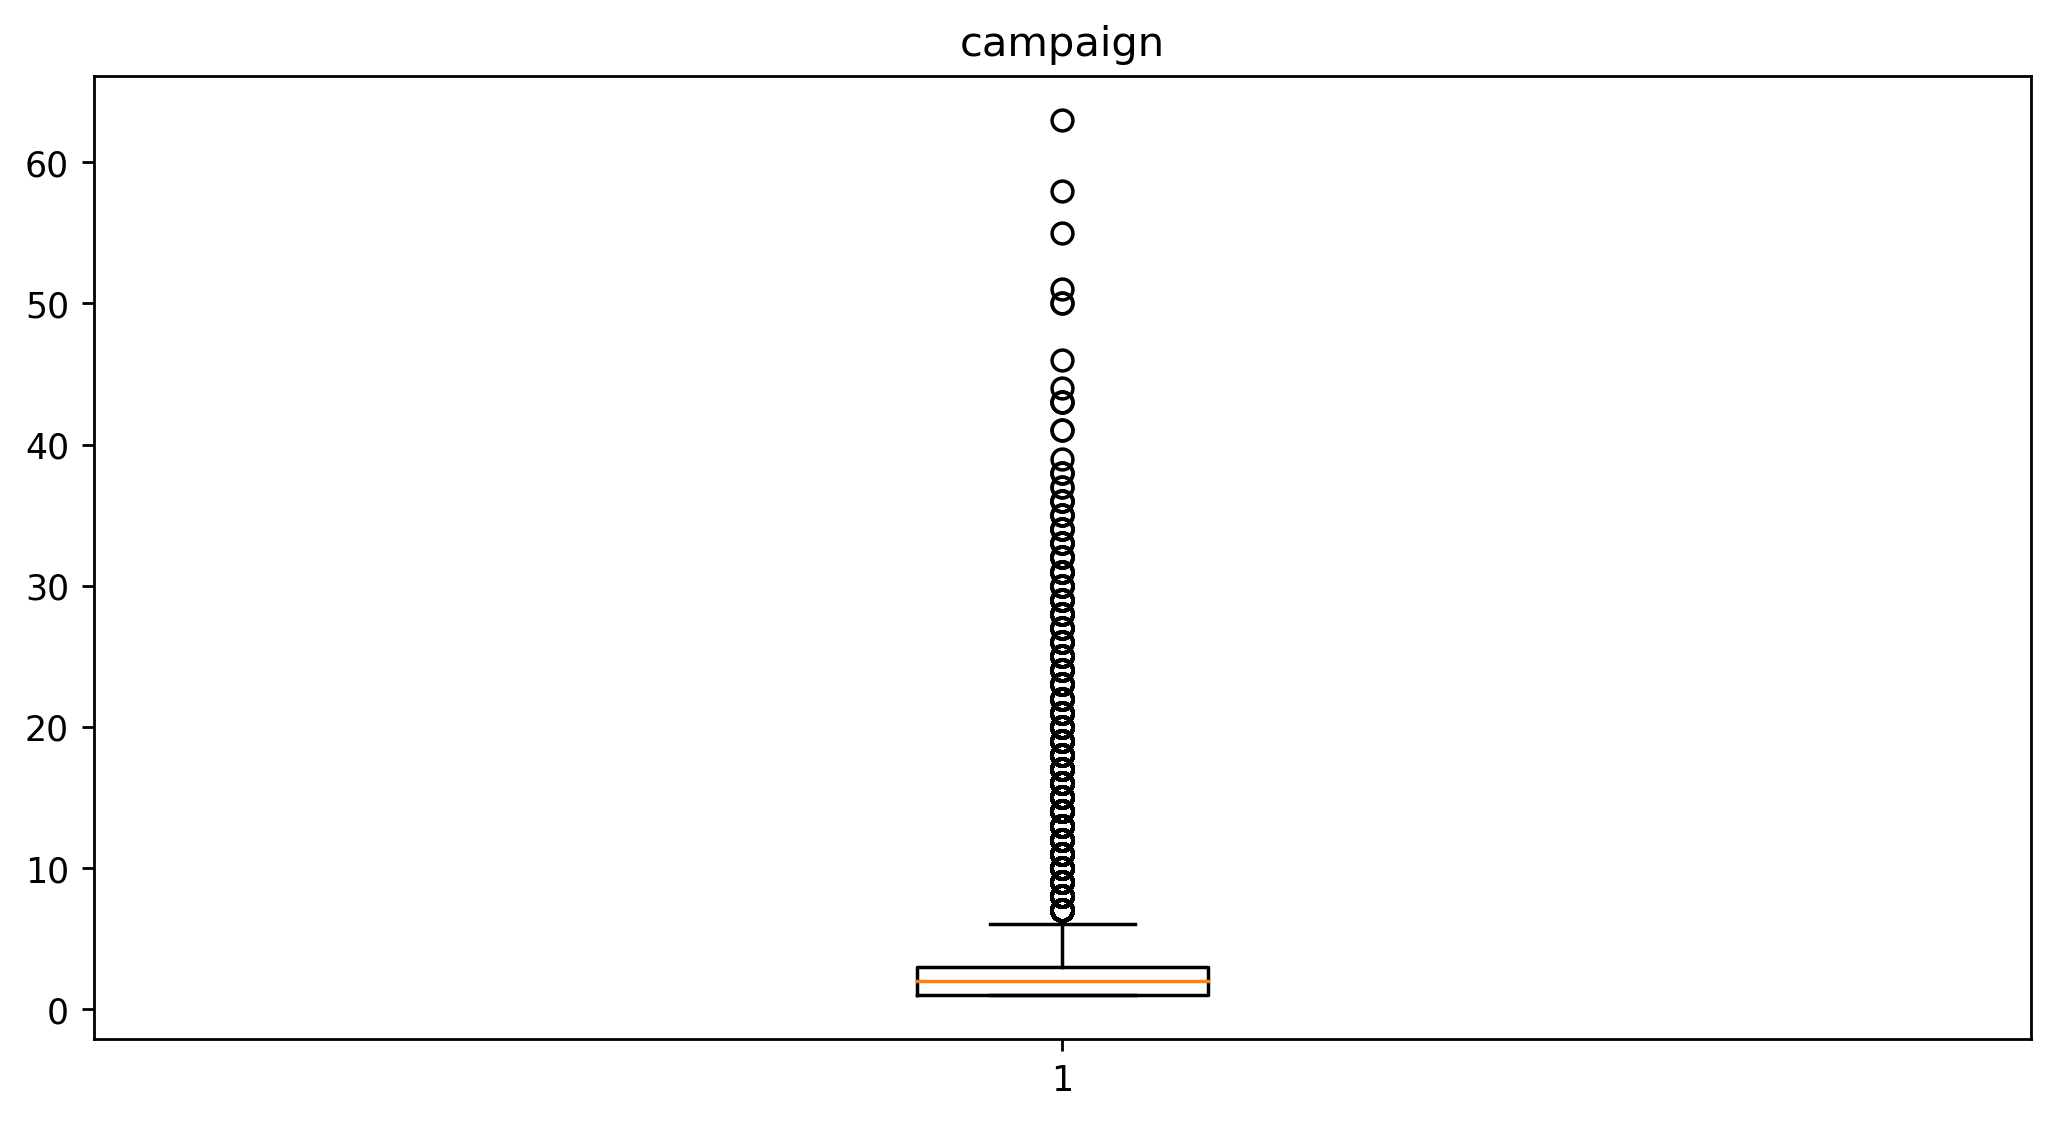

In [18]:
plt.subplot(1,1,1)
plt.boxplot(raw_dataset["campaign"])
plt.title("campaign")

Text(0.5, 1.0, 'pdays')

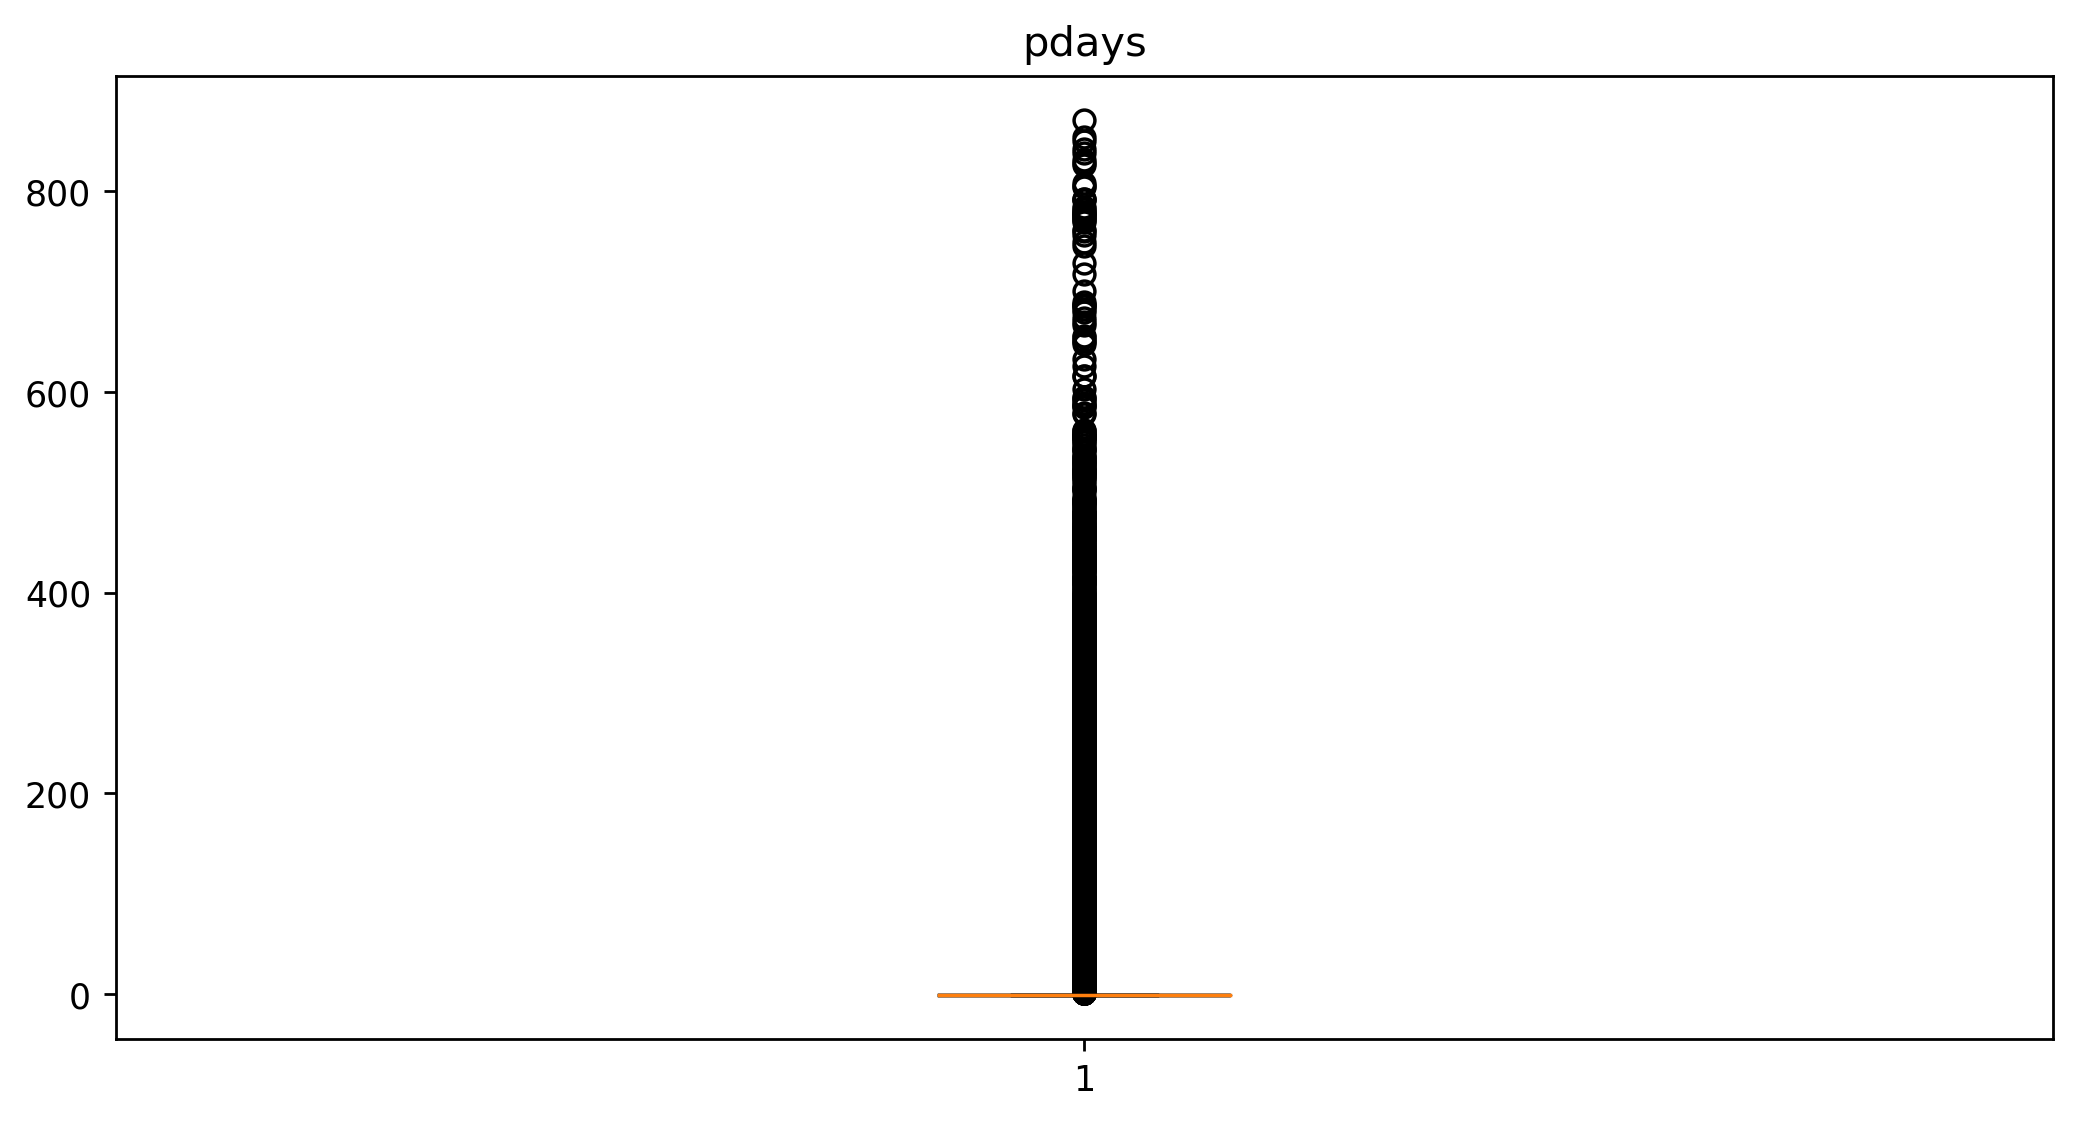

In [19]:
plt.subplot(1,1,1)
plt.boxplot(raw_dataset["pdays"])
plt.title("pdays")

Text(0.5, 1.0, 'previous')

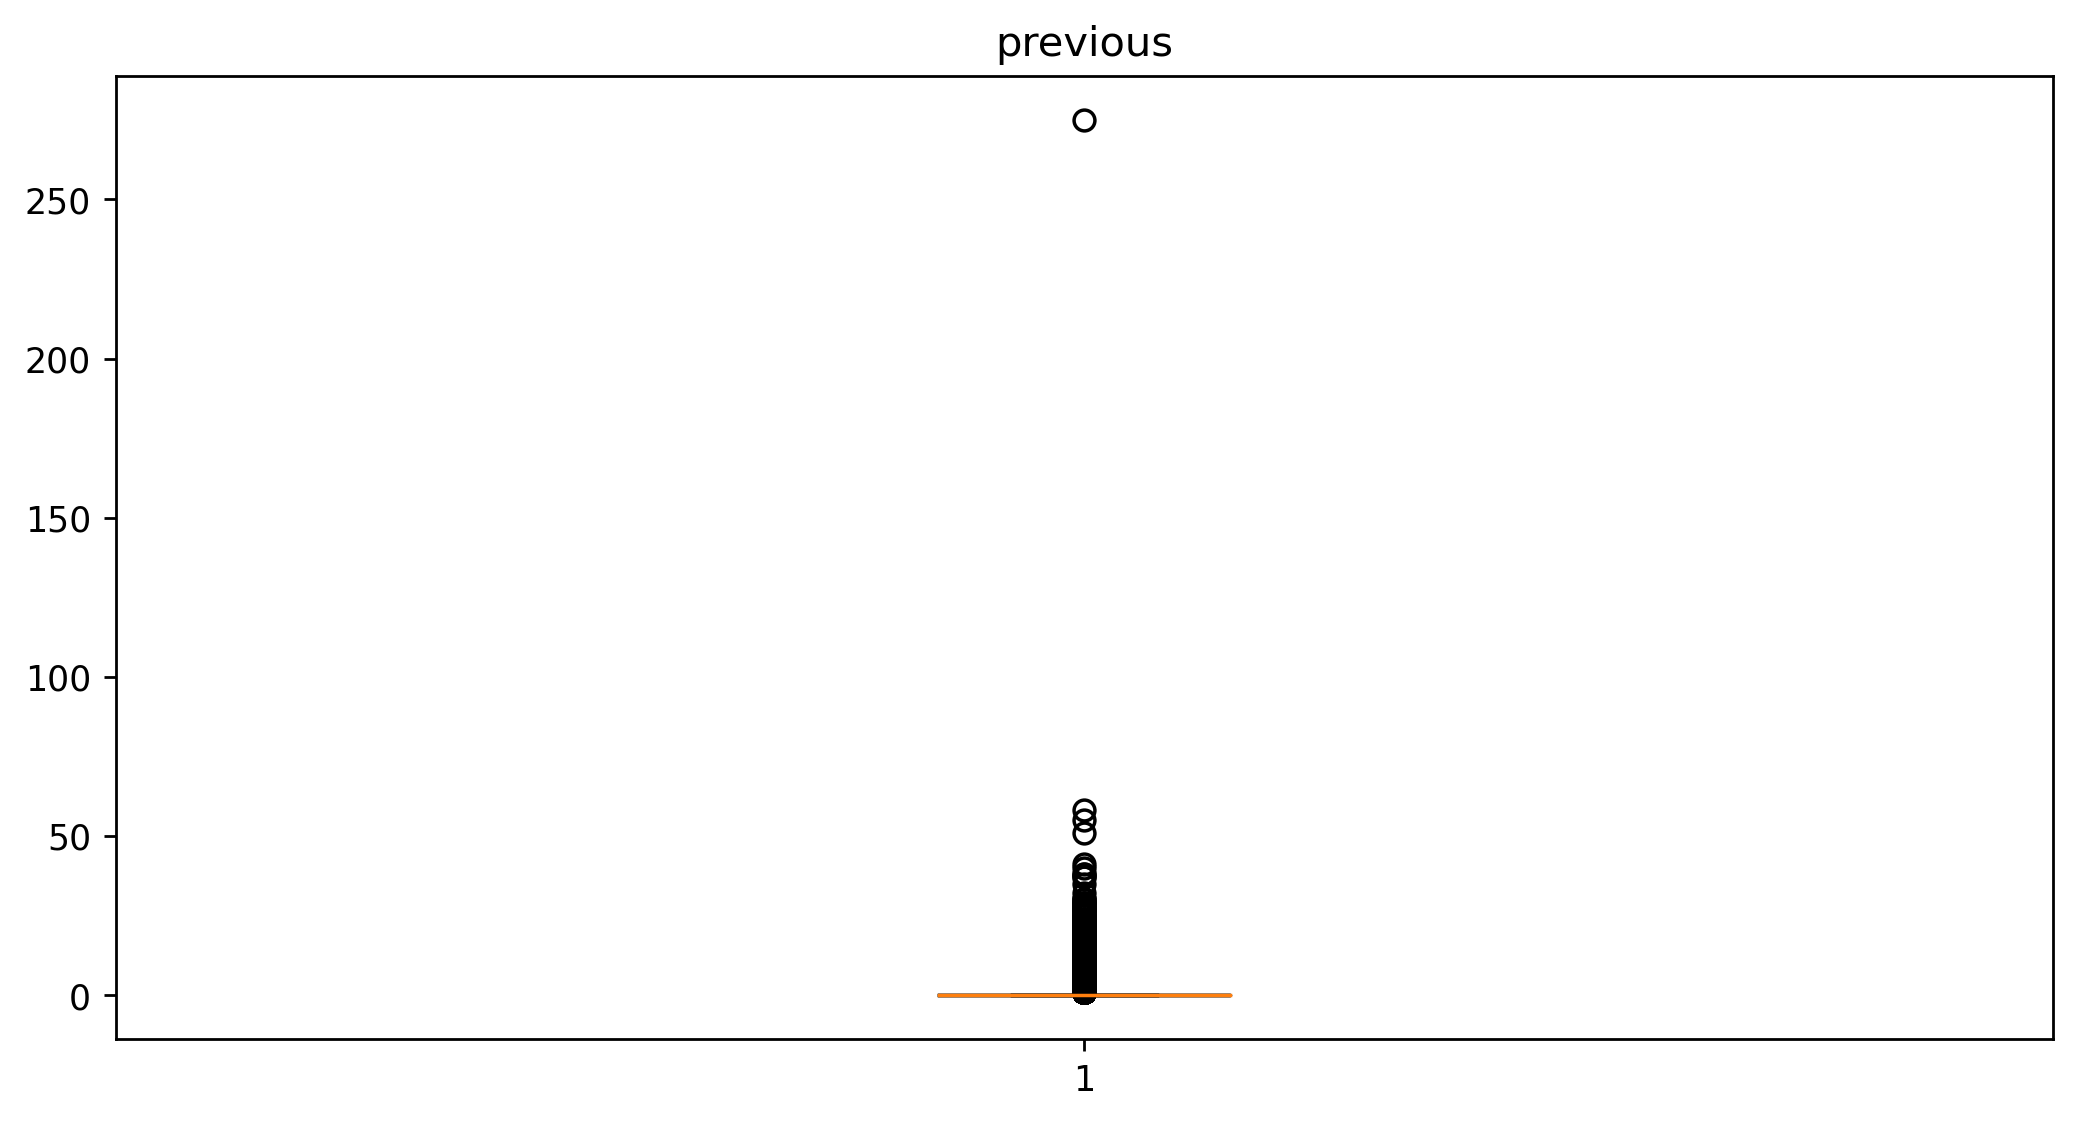

In [20]:
plt.subplot(1,1,1)
plt.boxplot(raw_dataset["previous"])
plt.title("previous")

# While looking at those mentioned boxplot, except for the day boxplot, all of the other boxes have more outliers. As a result, we cannot develop a model with an outlier, and we cannot eliminate the outlier because doing so would result in the loss of a significant amount of information. As a result, we are able to deal with outliers that have extremely high values.

# Outlier detection function

In [21]:
def outlier_detection (data,colname):
    q1 = data[colname].quantile(0.25)
    q3 = data[colname].quantile(0.75)
    iqr = q3-q1
    
    upper = q3+1.5*iqr
    lower = q1-1.5*iqr
    
    return lower,upper

In [22]:
raw_dataset.describe()

age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.000000  
max      871.000000    275.000000

In [23]:
outlier_detection(raw_dataset, "age")

(10.5, 70.5)

In [24]:
raw_dataset.loc[raw_dataset["age"]>70.5, "age"]

29158    83
29261    75
29263    75
29322    83
29865    75
         ..
45163    71
45191    75
45204    73
45207    71
45208    72
Name: age, Length: 487, dtype: int64

In [25]:
len(raw_dataset[raw_dataset["age"]>70.5])

487

# Capping Outliers

In [26]:
raw_dataset.loc[raw_dataset["age"]>70.5, "age"] = 70.5

Text(0.5, 1.0, 'After replacing outlier with upper extreme values')

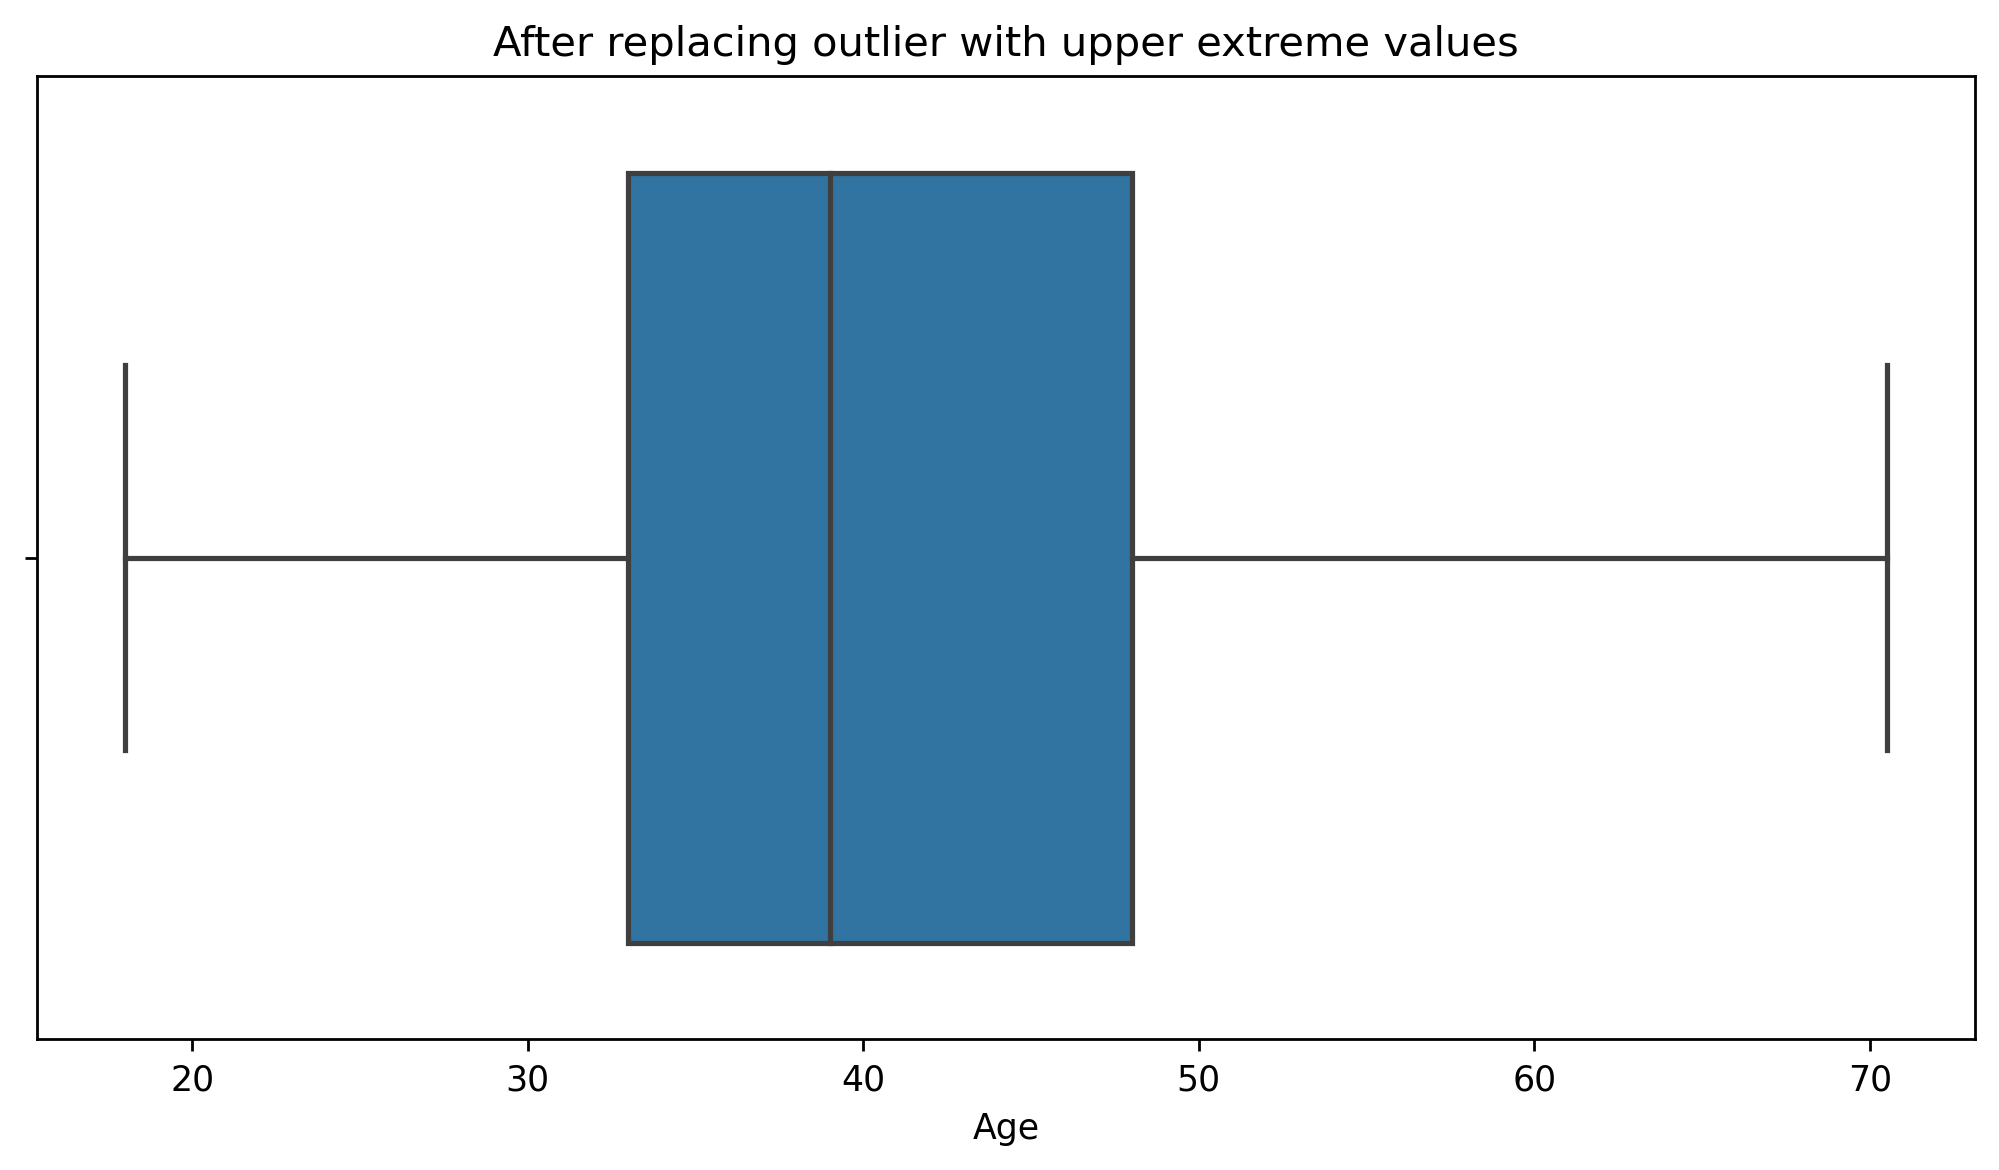

In [27]:
sns.boxplot(x = raw_dataset["age"])
plt.xlabel("Age")
plt.title("After replacing outlier with upper extreme values")

In [28]:
outlier_detection(raw_dataset, "balance")

(-1962.0, 3462.0)

Text(0.5, 1.0, 'Before replacing outlier with upper extreme values')

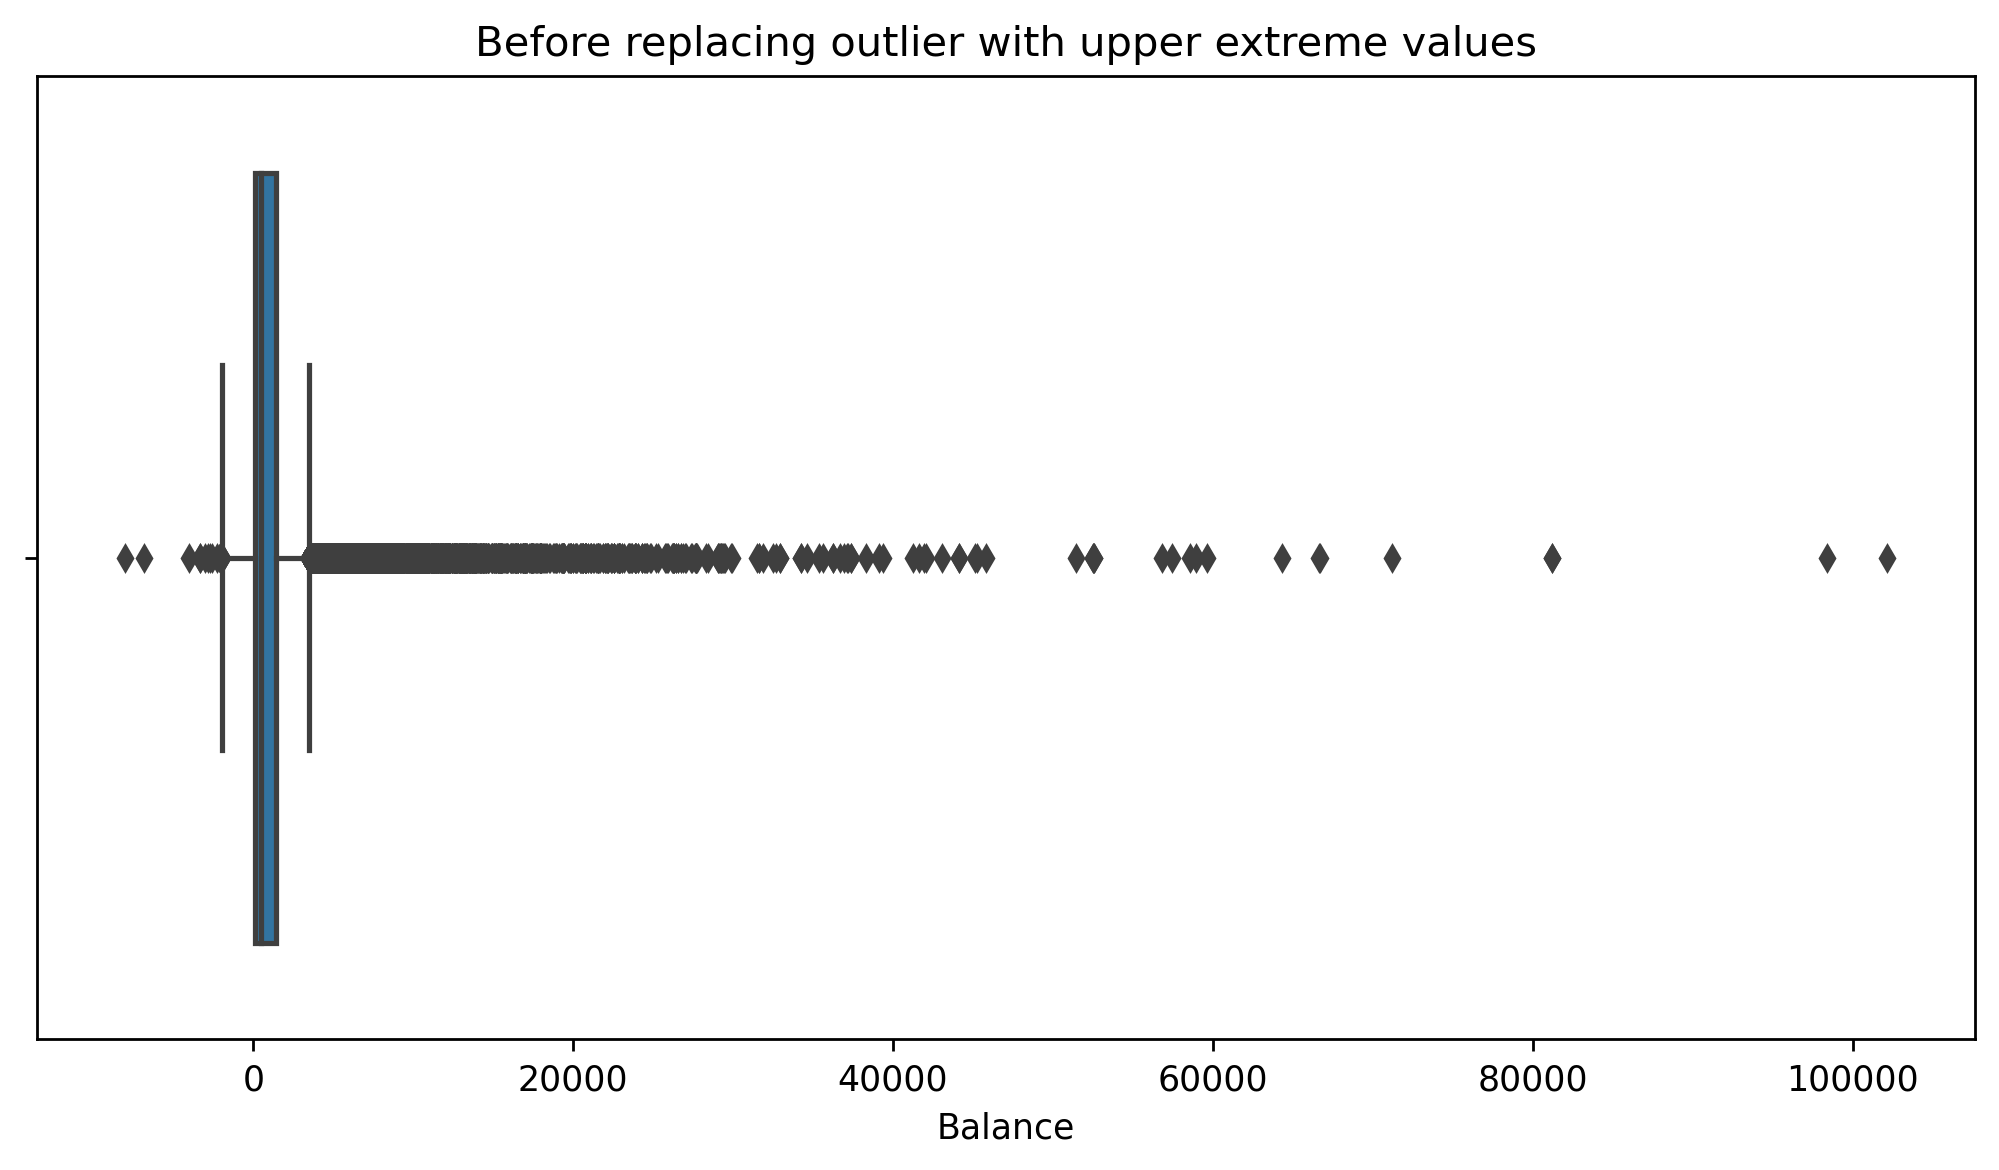

In [29]:
sns.boxplot(x = raw_dataset["balance"])
plt.xlabel("Balance")
plt.title("Before replacing outlier with upper extreme values")

In [30]:
raw_dataset.loc[raw_dataset["balance"]>3462.0, "balance"]

34       10635
65        6530
69       12223
70        5935
186       4384
         ...  
45164     4655
45181     6879
45185     4256
45191     3810
45208     5715
Name: balance, Length: 4712, dtype: int64

In [31]:
len(raw_dataset[raw_dataset["balance"]>3462.0])

4712

In [32]:
raw_dataset.loc[raw_dataset["balance"]>3462.0, "balance"] = 3462.0

Text(0.5, 1.0, 'After replacing outlier with upper extreme values')

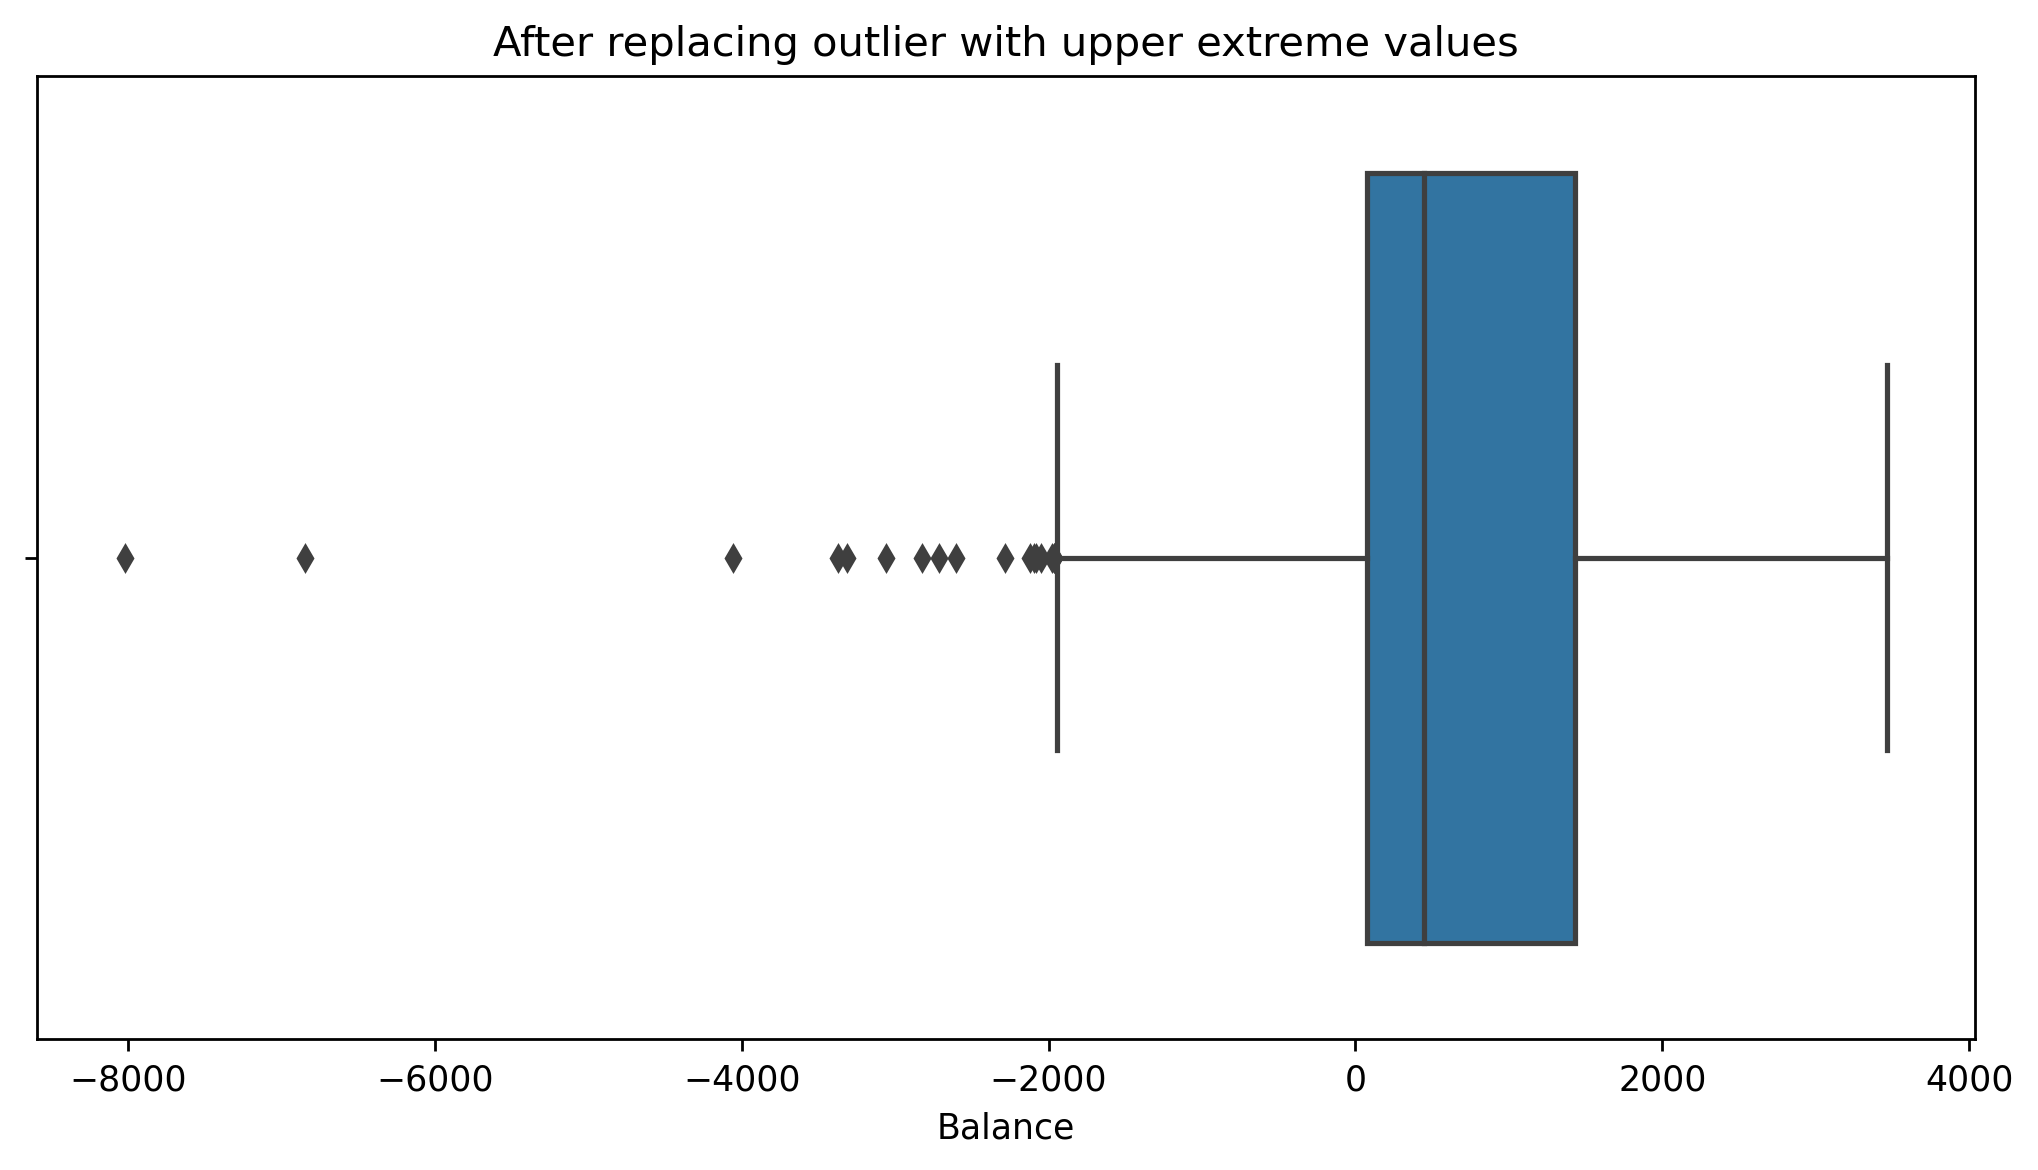

In [33]:
sns.boxplot(x = raw_dataset["balance"])
plt.xlabel("Balance")
plt.title("After replacing outlier with upper extreme values")

In [34]:
raw_dataset.loc[raw_dataset["balance"]<-1962.0, "balance"]

1896    -3313
7413    -3372
7756    -2049
11655   -1968
12909   -8019
13687   -2093
13708   -1965
14434   -2282
15682   -6847
17159   -2082
18573   -2827
20317   -1980
25119   -2604
25240   -2122
31509   -2712
32713   -3058
38736   -4057
Name: balance, dtype: int64

In [35]:
len(raw_dataset[raw_dataset["balance"]<-1962.0])

17

In [36]:
raw_dataset.loc[raw_dataset["balance"]<-1962.0, "balance"] = 1962.0

Text(0.5, 1.0, 'After replacing outlier with upper and lower extreme values')

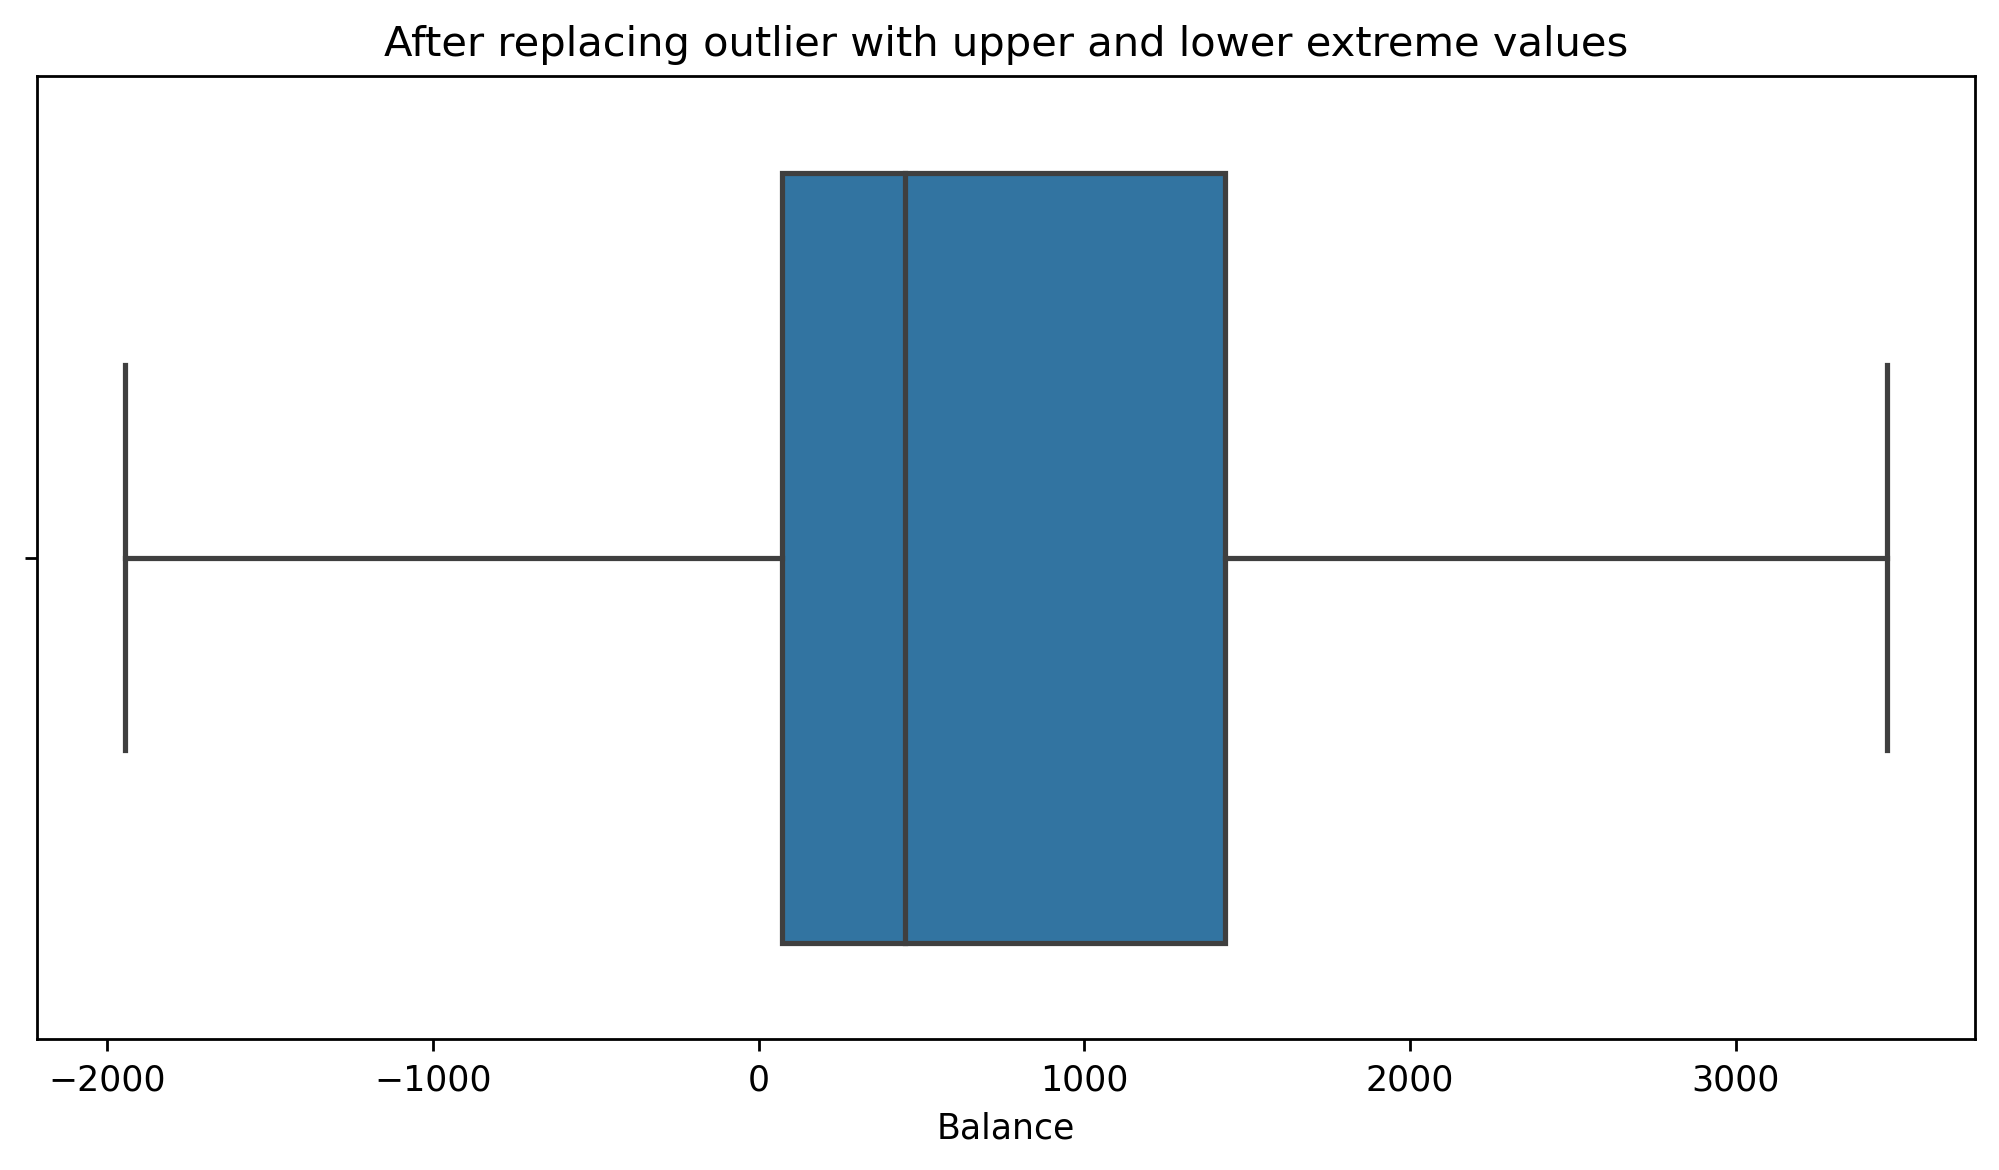

In [37]:
sns.boxplot(x = raw_dataset["balance"])
plt.xlabel("Balance")
plt.title("After replacing outlier with upper and lower extreme values")

In [38]:
outlier_detection(raw_dataset, "duration")

(-221.0, 643.0)

In [39]:
raw_dataset.loc[raw_dataset["duration"]>643.0, "duration"] = 643.0

Text(0.5, 1.0, 'After replacing outlier with upper extreme values')

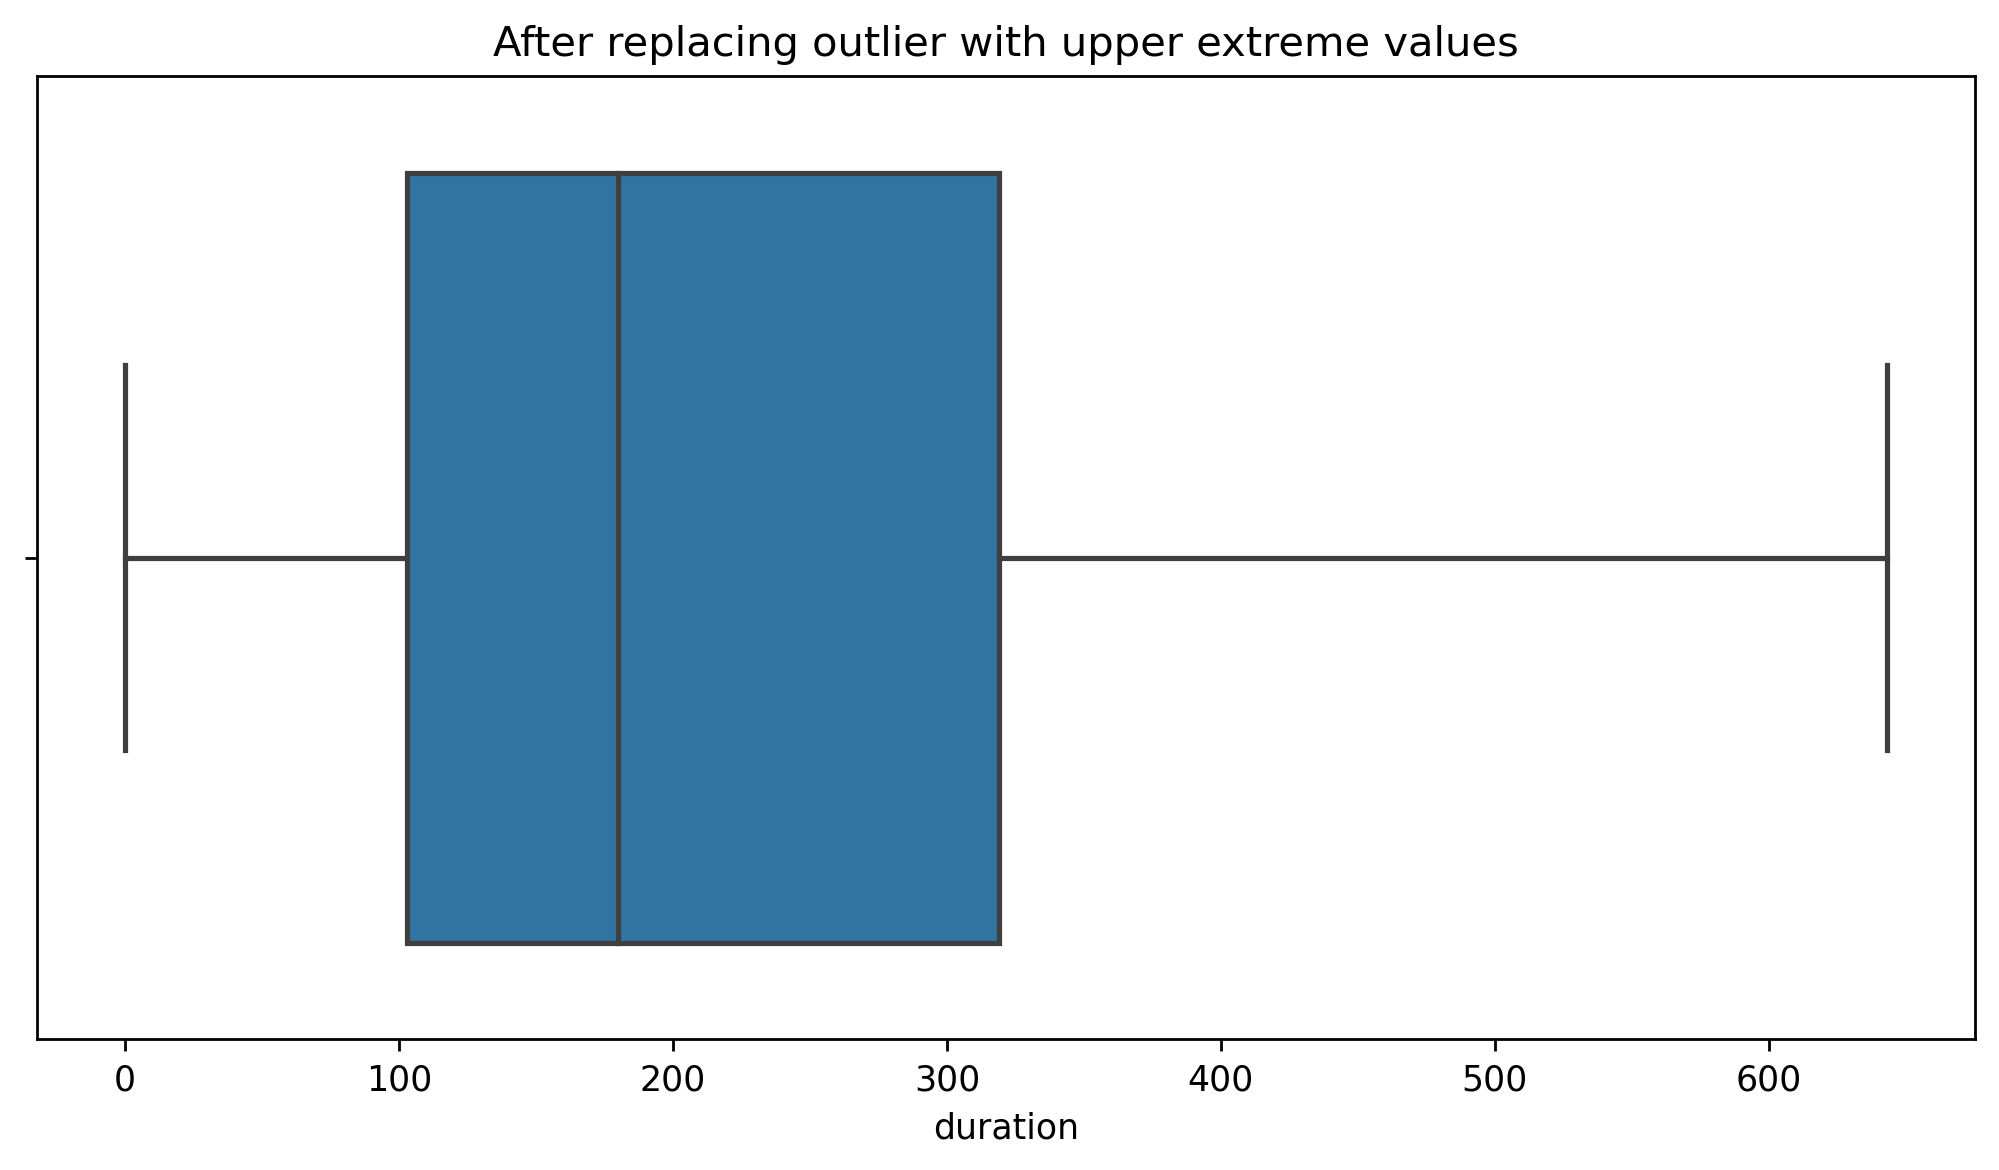

In [40]:
sns.boxplot(x = raw_dataset["duration"])
plt.xlabel("duration")
plt.title("After replacing outlier with upper extreme values")

In [41]:
outlier_detection(raw_dataset, "campaign")

(-2.0, 6.0)

In [42]:
raw_dataset.loc[raw_dataset["campaign"]>6.0, "campaign"] = 6.0

Text(0.5, 1.0, 'After replacing outlier with upper extreme values')

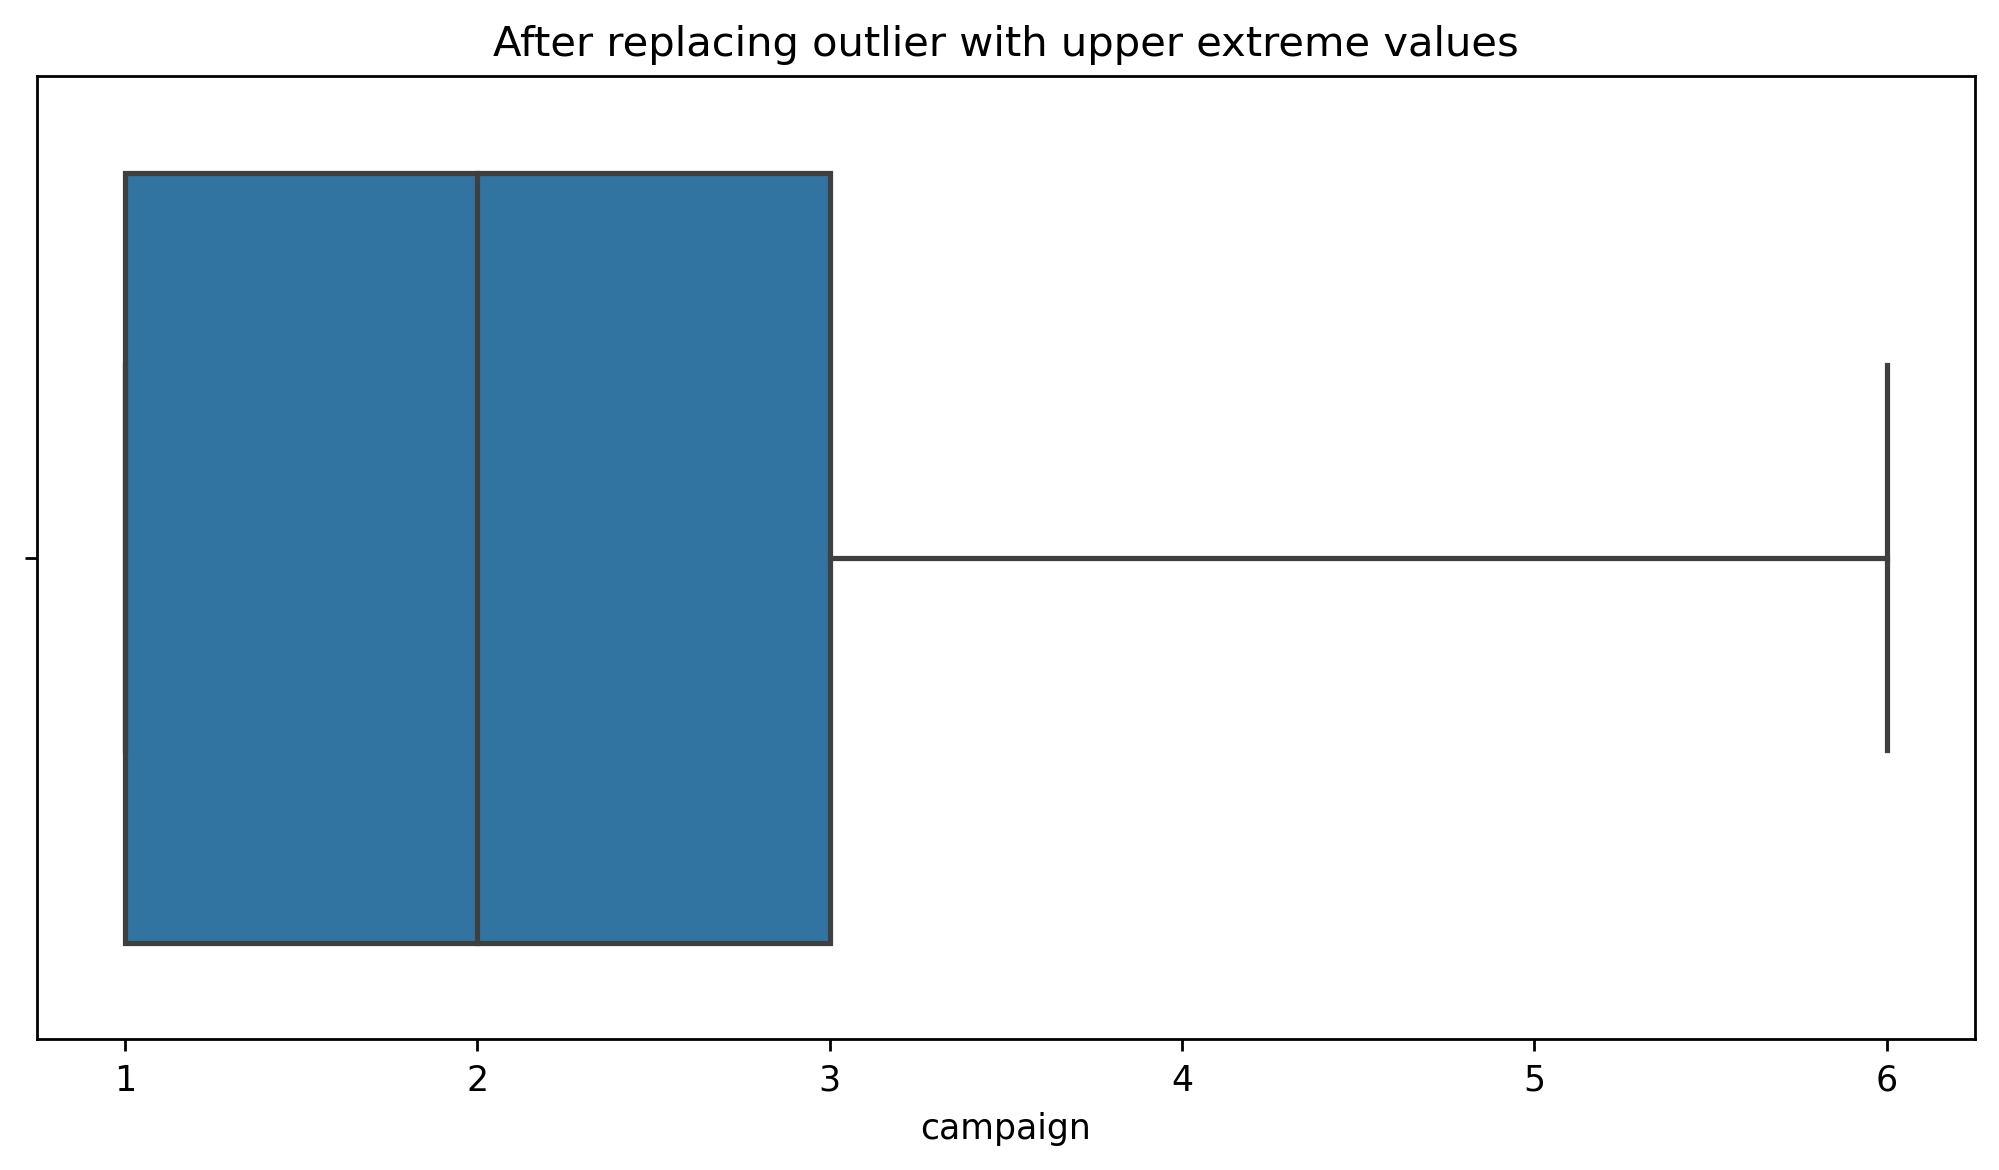

In [43]:
sns.boxplot(x = raw_dataset["campaign"])
plt.xlabel("campaign")
plt.title("After replacing outlier with upper extreme values")

In [44]:
outlier_detection(raw_dataset, "pdays")

(-1.0, -1.0)

<Axes: xlabel='pdays'>

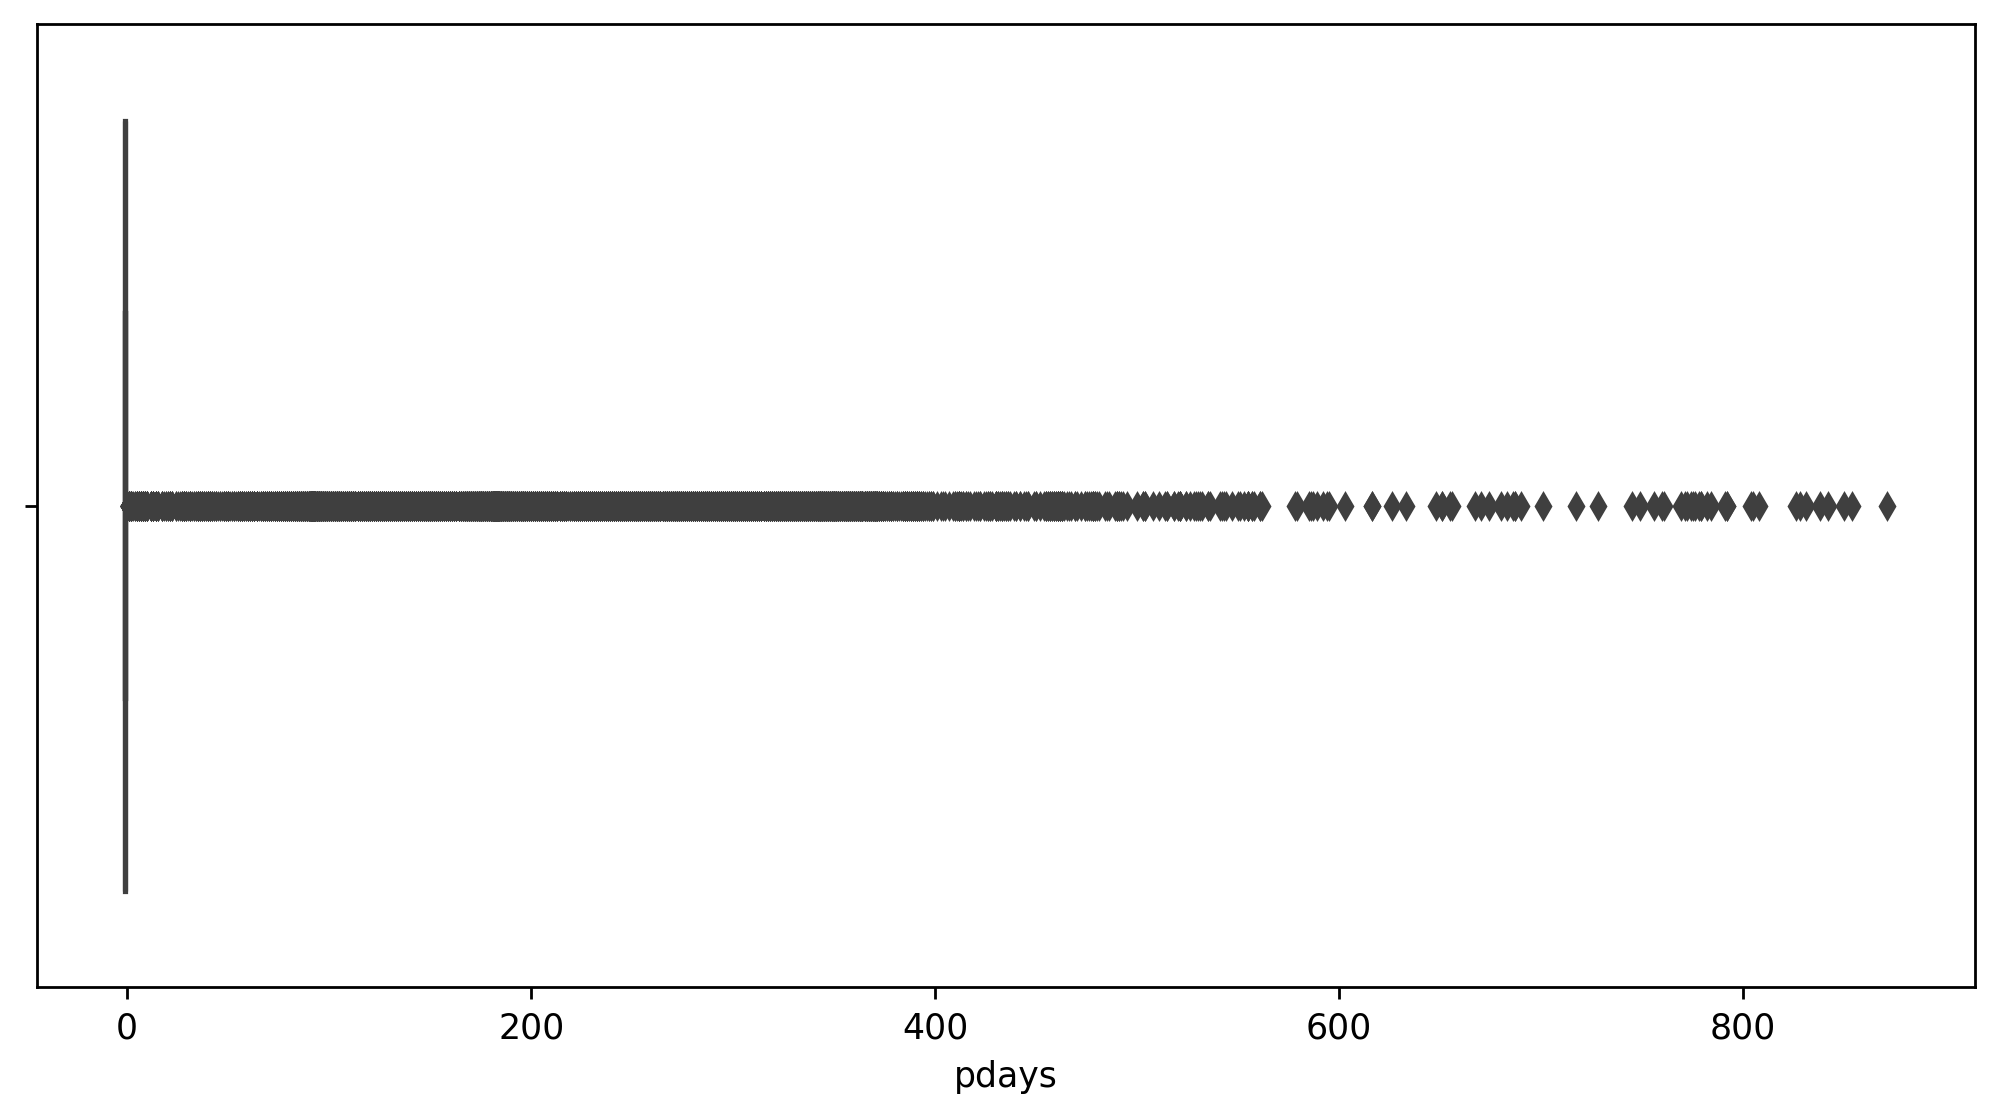

In [45]:
sns.boxplot(x = raw_dataset["pdays"])

In [46]:
raw_dataset.loc[raw_dataset["pdays"]>-1, "pdays"] = -1

Text(0.5, 1.0, 'After replacing outlier with upper extreme values')

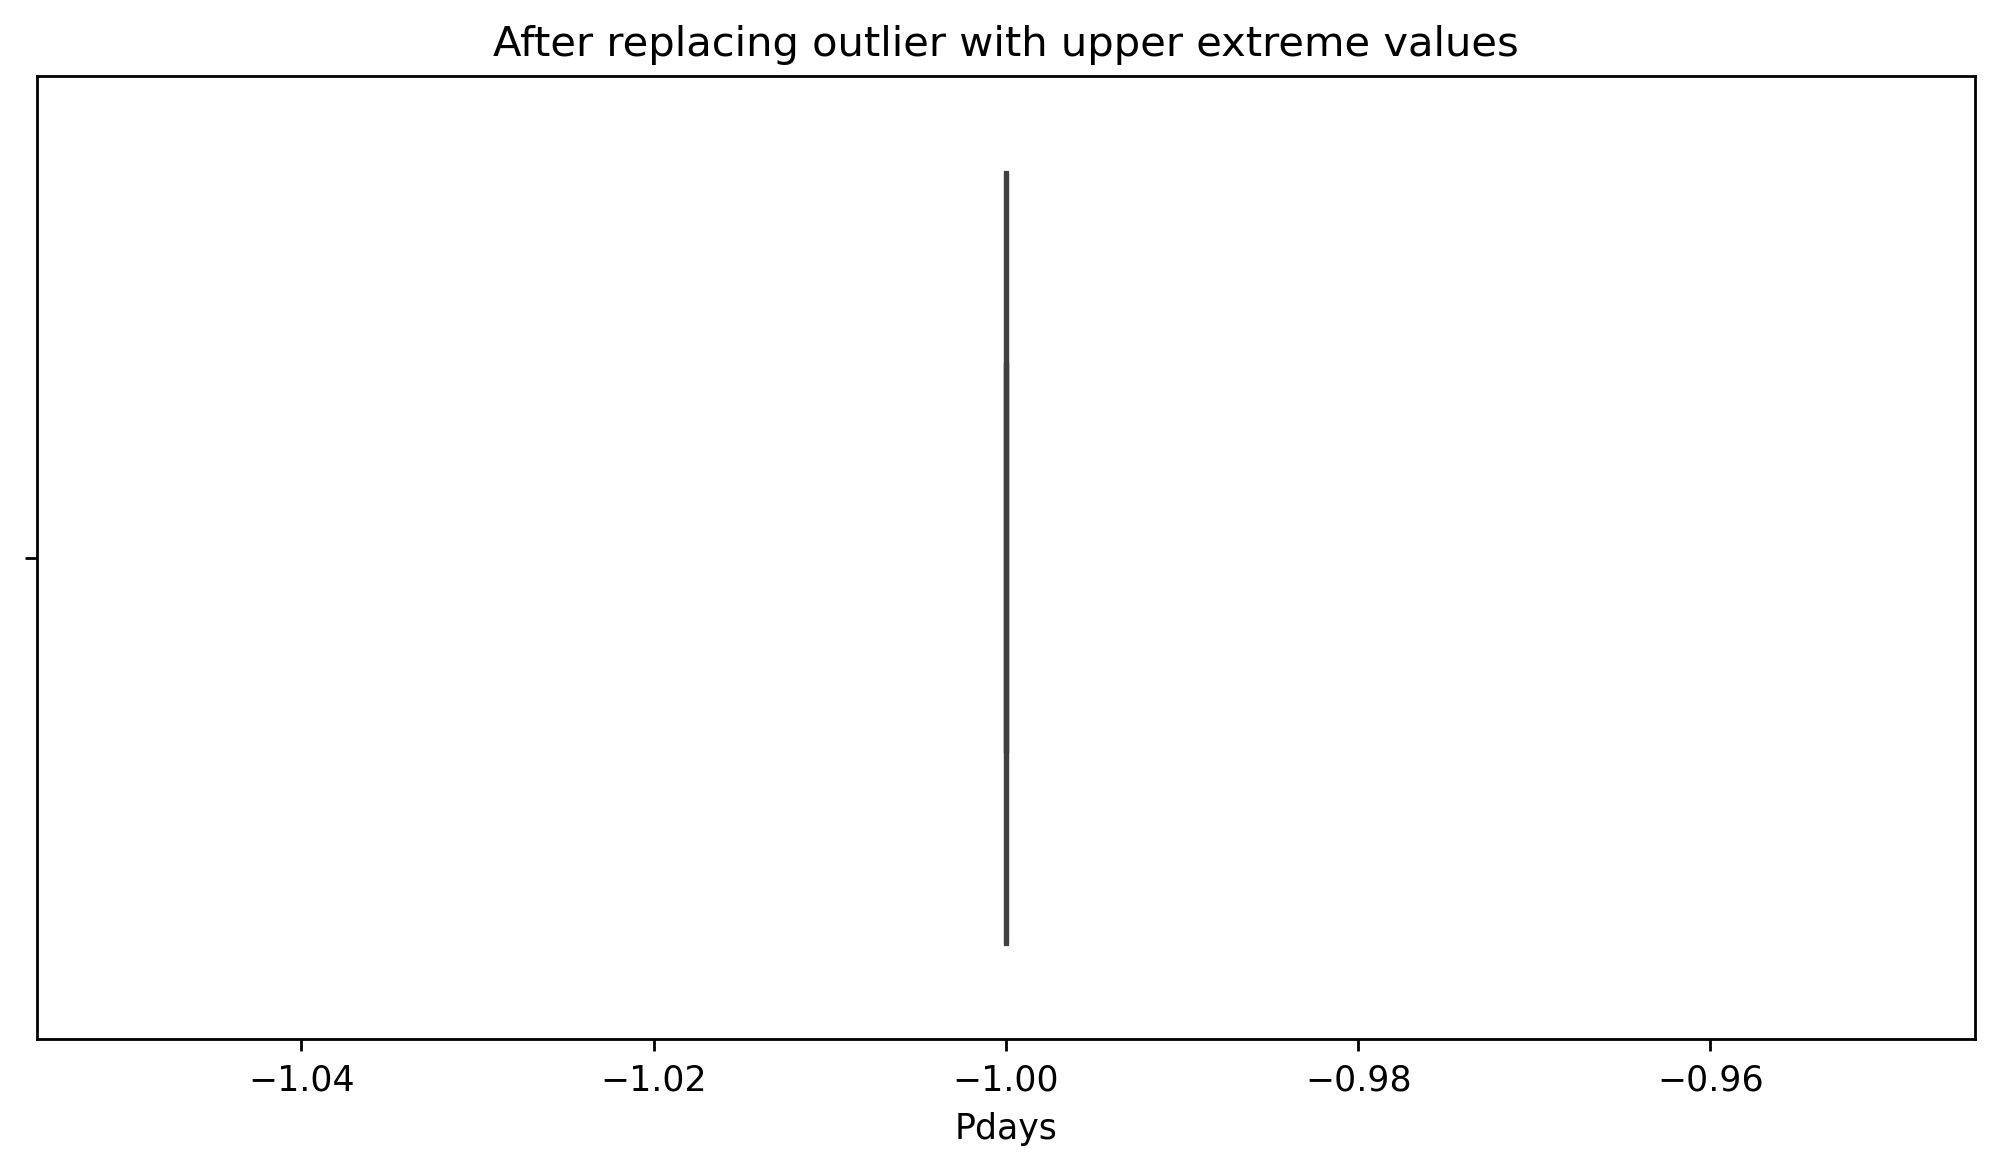

In [47]:
sns.boxplot(x = raw_dataset["pdays"])
plt.xlabel("Pdays")
plt.title("After replacing outlier with upper extreme values")

In [48]:
outlier_detection(raw_dataset, "previous")

(0.0, 0.0)

In [49]:
raw_dataset.loc[raw_dataset["previous"]>0.0, "previous"] = 0.0

Text(0.5, 1.0, 'After replacing outlier with upper extreme values')

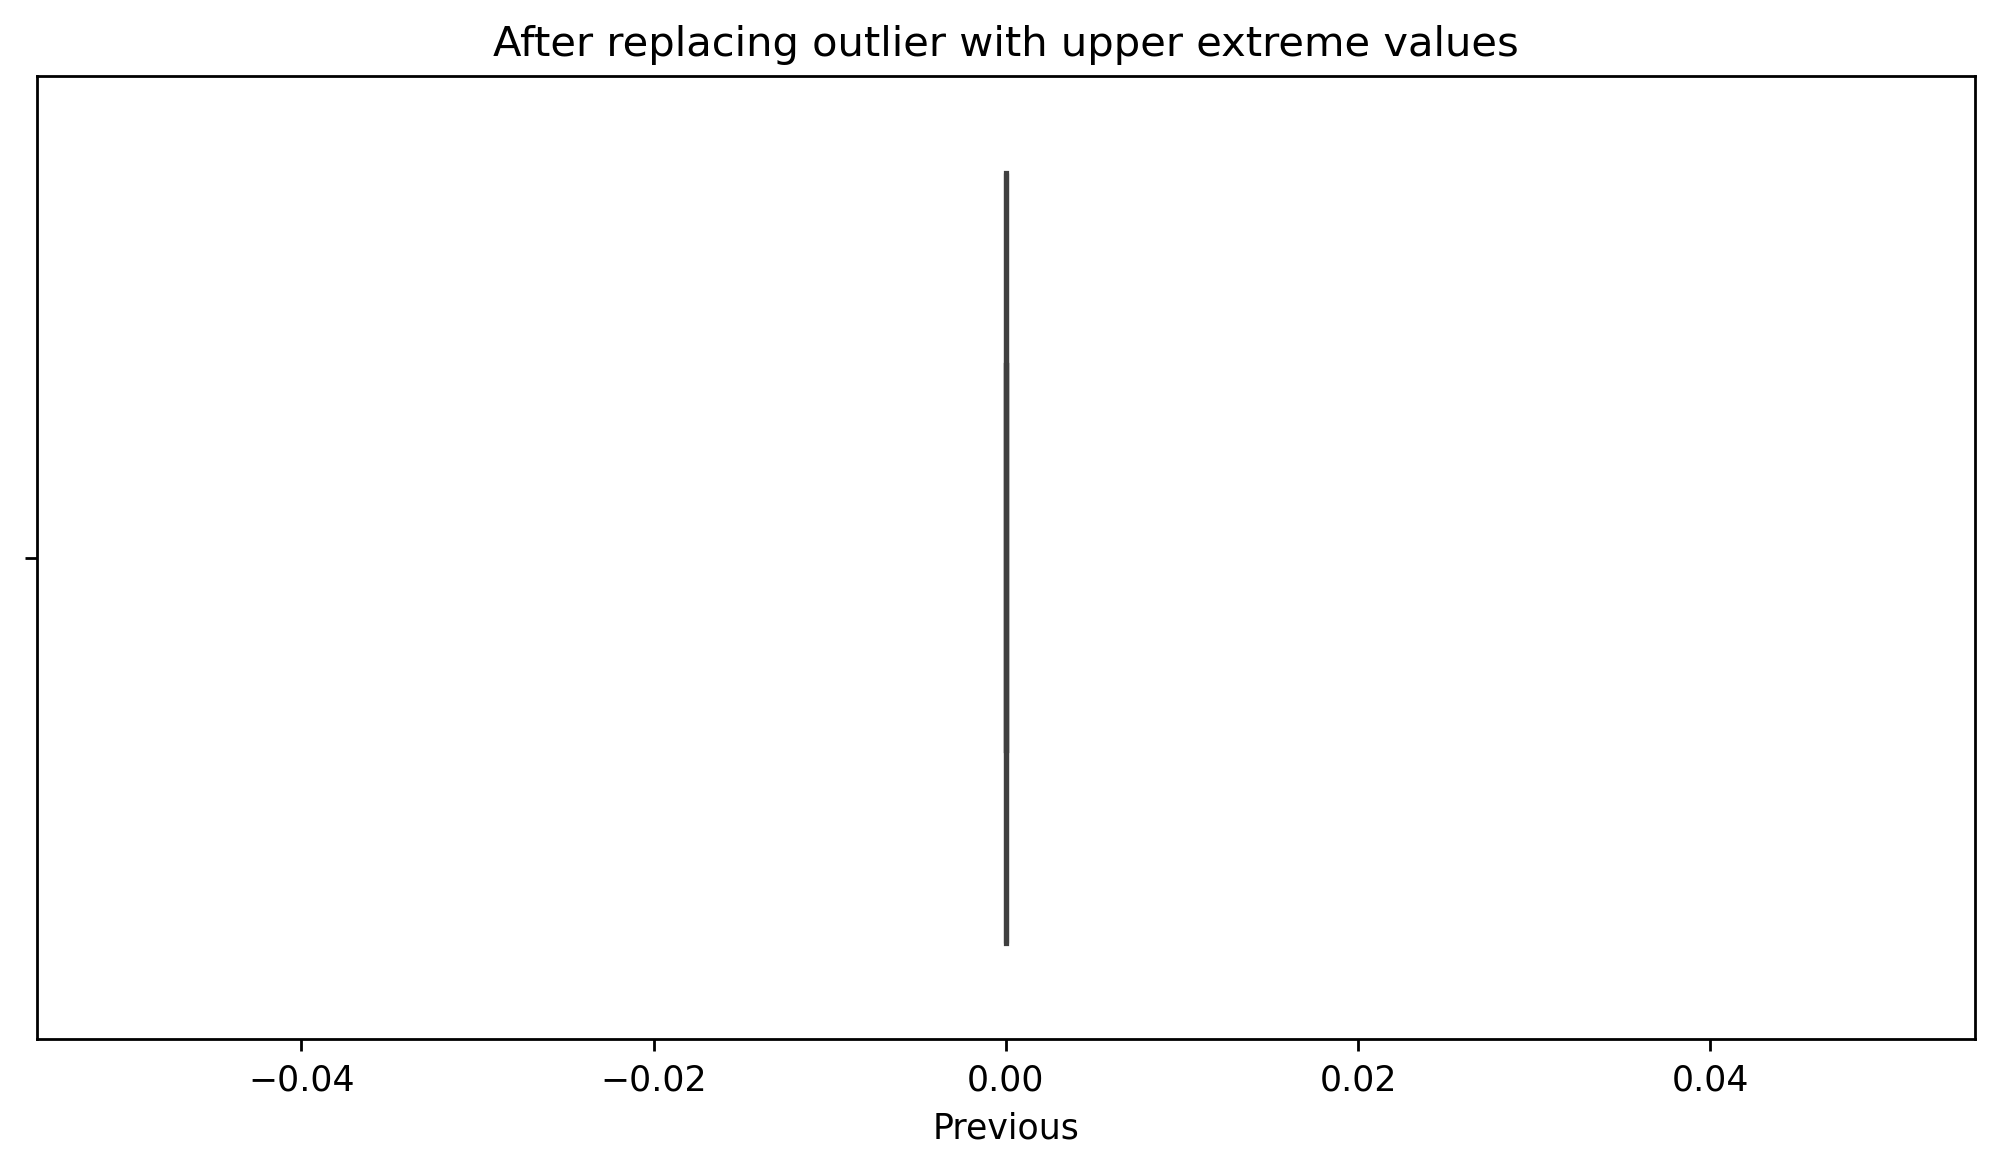

In [50]:
sns.boxplot(x = raw_dataset["previous"])
plt.xlabel("Previous")
plt.title("After replacing outlier with upper extreme values")

Text(0.5, 1.0, 'previous')

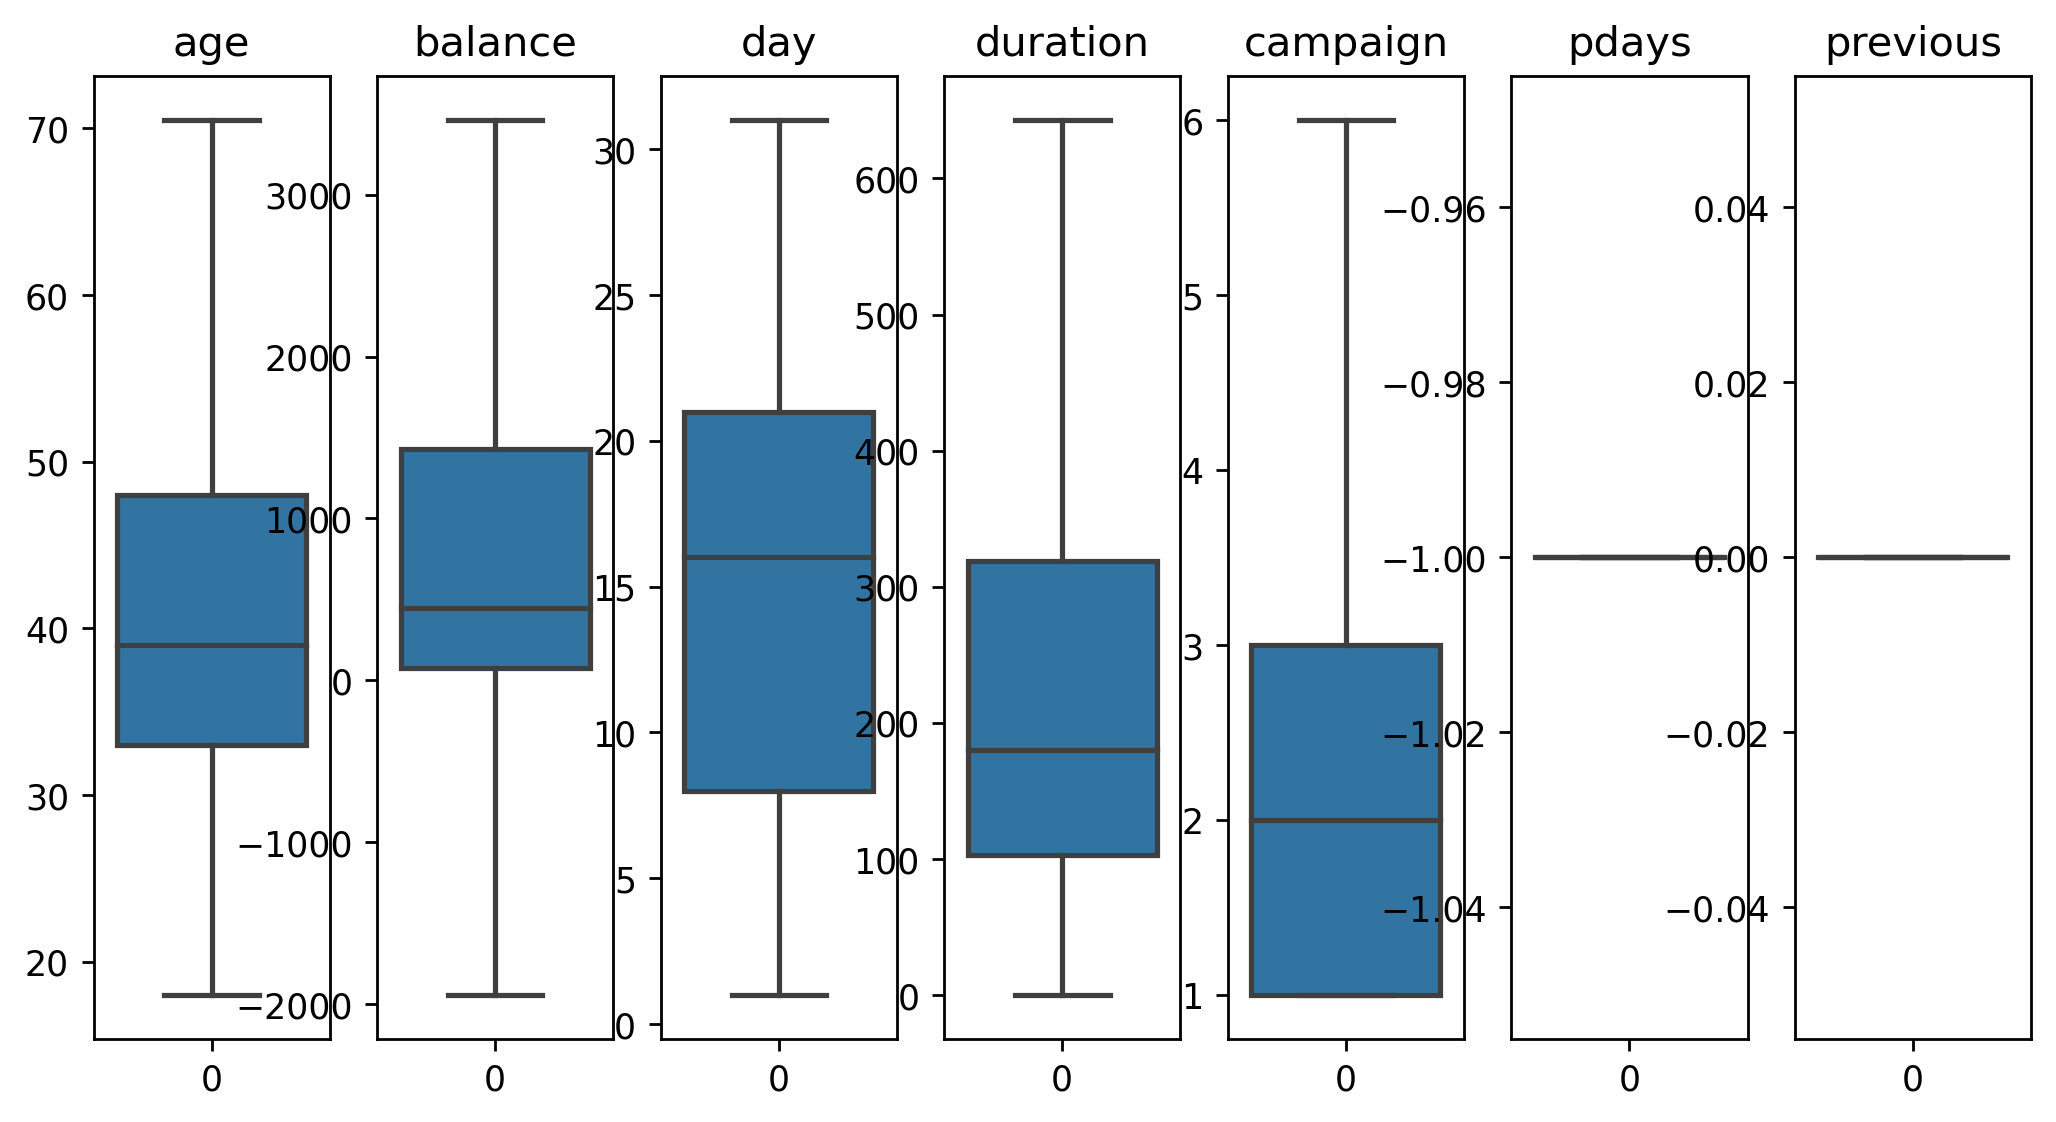

In [51]:
plt.subplot(1,7,1)
sns.boxplot(raw_dataset['age'])
plt.title("age")

plt.subplot(1,7,2)
sns.boxplot(raw_dataset['balance'])
plt.title("balance")

plt.subplot(1,7,3)
sns.boxplot(raw_dataset['day'])
plt.title("day")

plt.subplot(1,7,4)
sns.boxplot(raw_dataset['duration'])
plt.title("duration")

plt.subplot(1,7,5)
sns.boxplot(raw_dataset['campaign'])
plt.title("campaign")

plt.subplot(1,7,6)
sns.boxplot(raw_dataset['pdays'])
plt.title("pdays")

plt.subplot(1,7,7)
sns.boxplot(raw_dataset['previous'])
plt.title("previous")

# Now, looking at the above boxplot, it does not represent any outlier because we have replaced all of the outliers with the help of upper and lower extreme values. Now, the dataset is ready to create model.

# Scatter Plot and Correlation

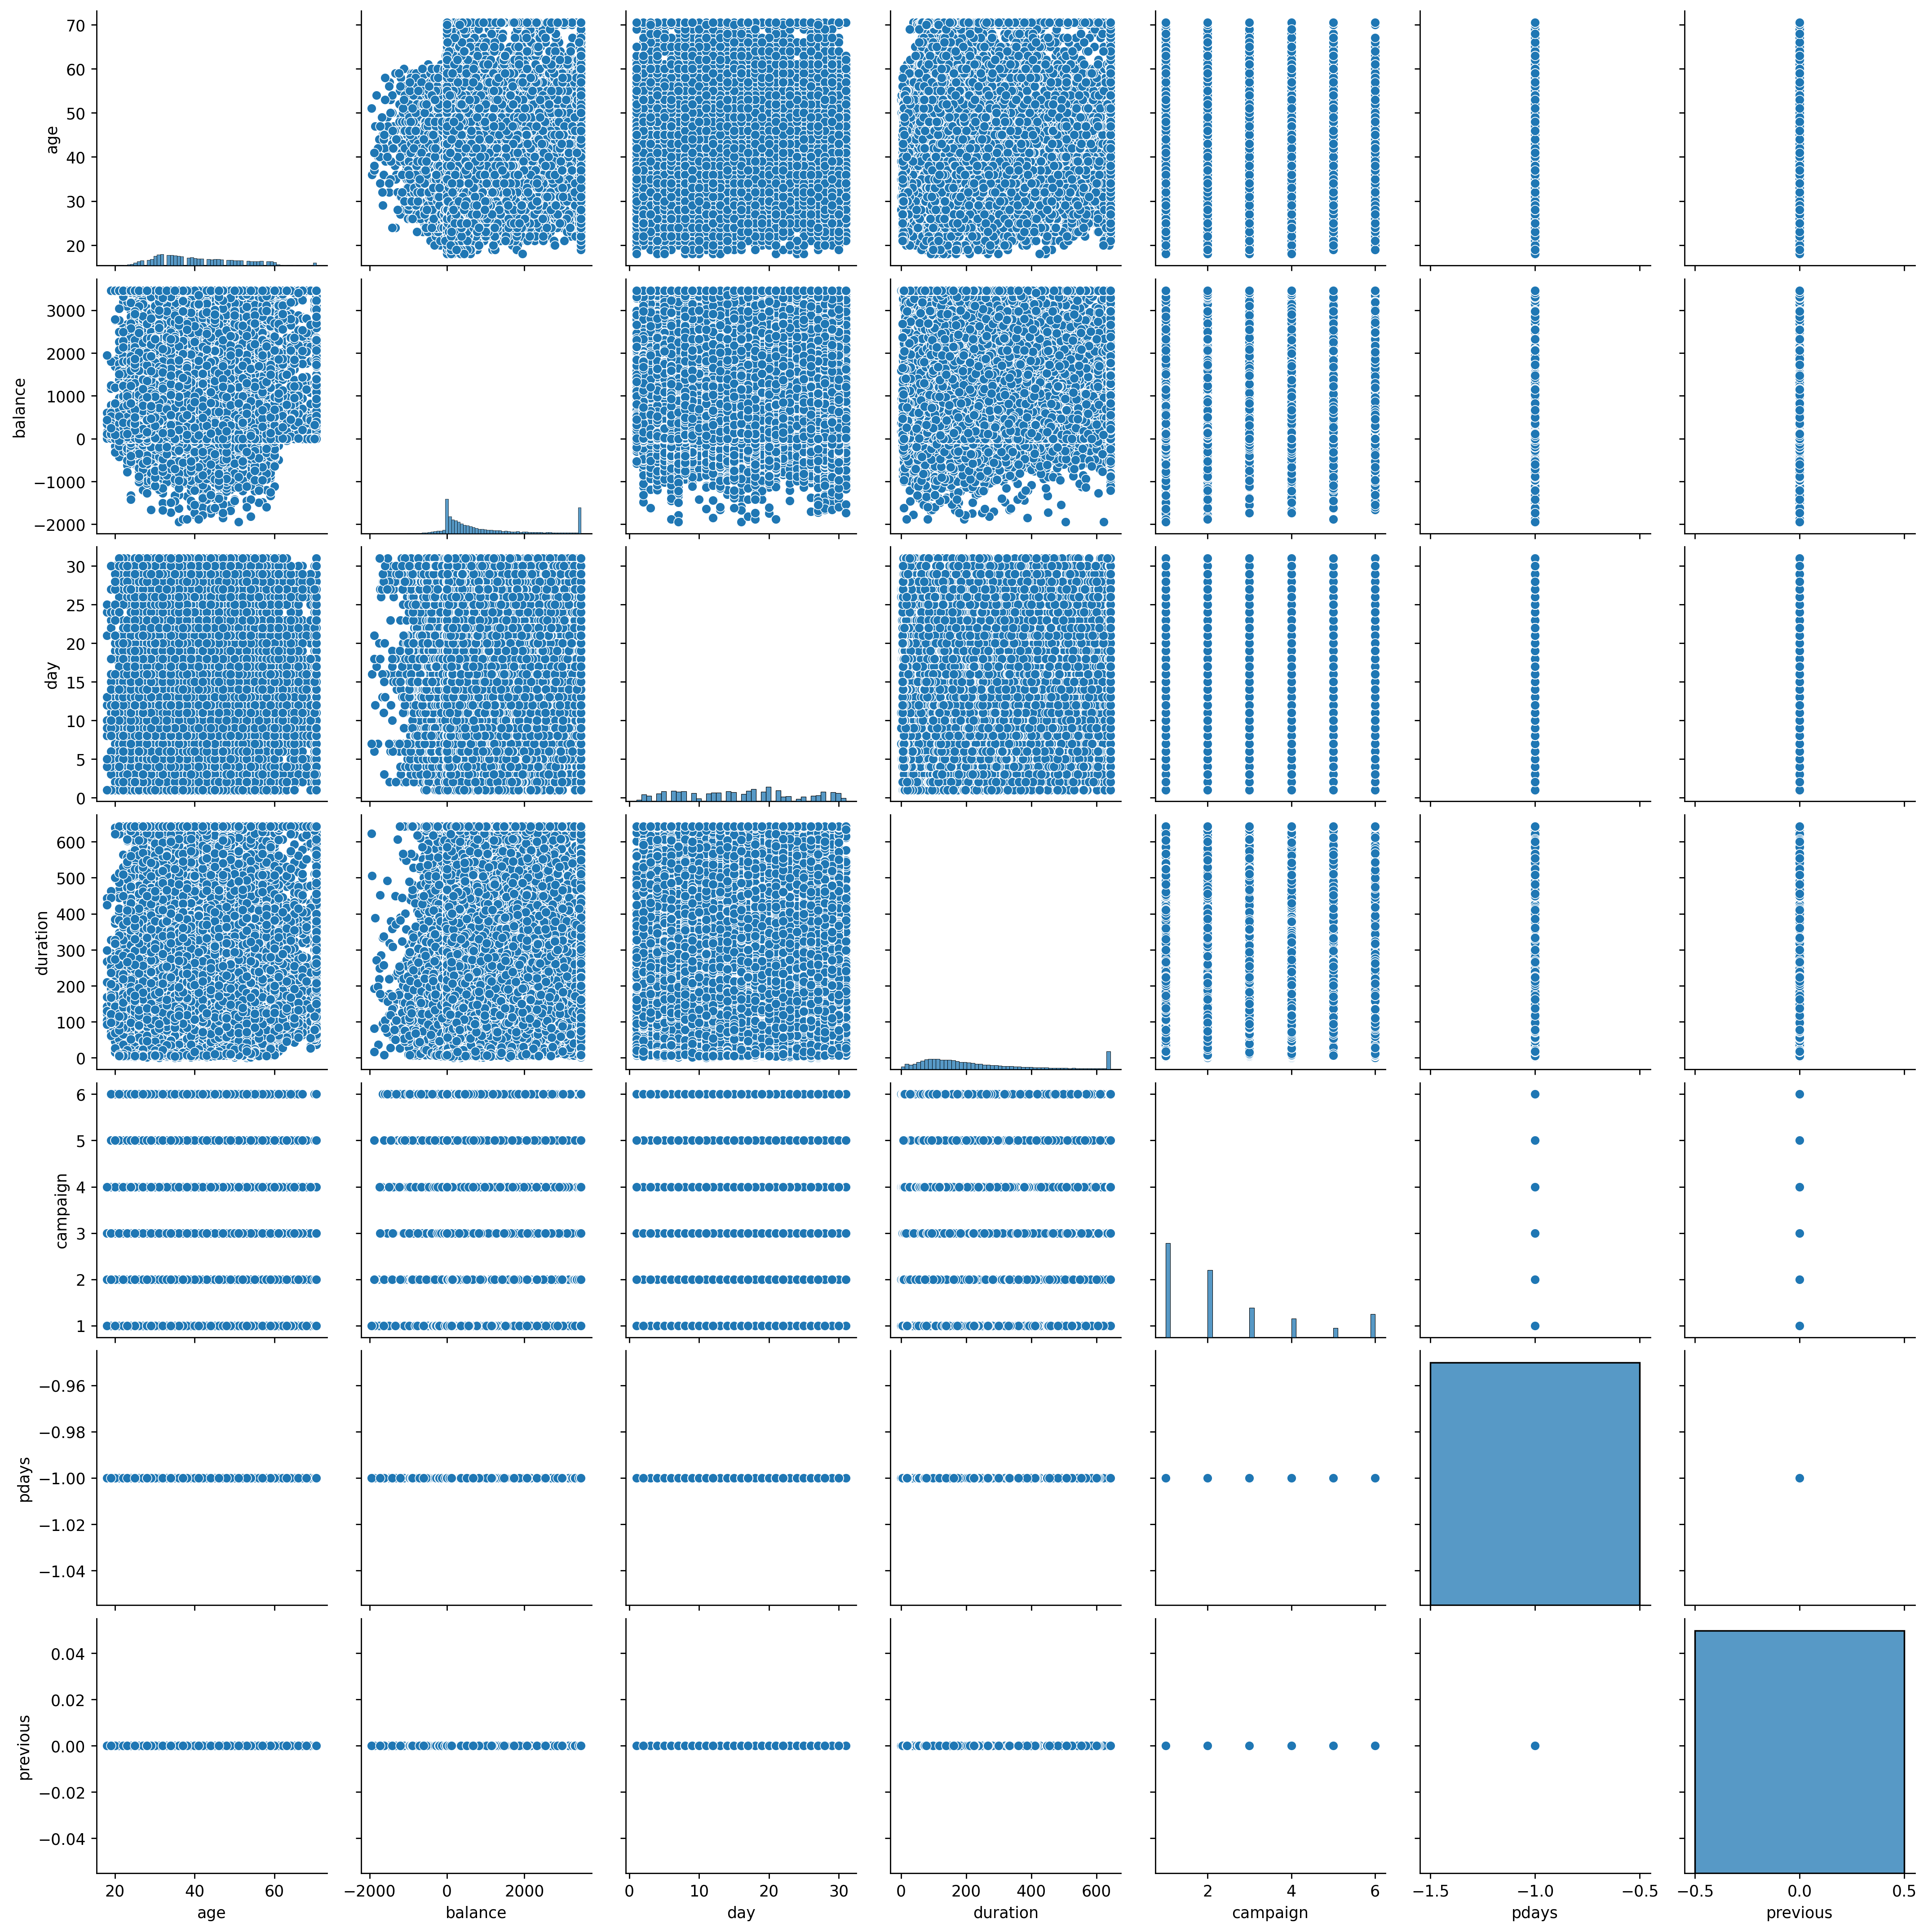

In [52]:
sns.pairplot(raw_dataset)

# Correlation coefficient

In [53]:
raw_dataset.corr(numeric_only=True)

age   balance       day  duration  campaign  pdays  previous
age       1.000000  0.122303 -0.008843 -0.014287  0.025791    NaN       NaN
balance   0.122303  1.000000  0.010188  0.042164 -0.026312    NaN       NaN
day      -0.008843  0.010188  1.000000 -0.039285  0.152975    NaN       NaN
duration -0.014287  0.042164 -0.039285  1.000000 -0.100049    NaN       NaN
campaign  0.025791 -0.026312  0.152975 -0.100049  1.000000    NaN       NaN
pdays          NaN       NaN       NaN       NaN       NaN    NaN       NaN
previous       NaN       NaN       NaN       NaN       NaN    NaN       NaN

In [54]:
sns.heatmap(raw_dataset.corr(numeric_only=True),annot=True, cmap="viridis")

<Axes: >

# Transformations

- Machines do not understand words and sentences.
- Machines only understand numbers.
- Before model building, we have convert all the categorical columns into numerical.

In [55]:
raw_dataset.head()

age           job  marital  education default  balance housing loan  \
0  58.0    management  married   tertiary      no     2143     yes   no   
1  44.0    technician   single  secondary      no       29     yes   no   
2  33.0  entrepreneur  married  secondary      no        2     yes  yes   
3  47.0   blue-collar  married    unknown      no     1506     yes   no   
4  33.0       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

In [56]:
raw_dataset['job']=raw_dataset['job'].astype('category')
raw_dataset['marital']=raw_dataset['marital'].astype('category')
raw_dataset['education']=raw_dataset['education'].astype('category')
raw_dataset['default']=raw_dataset['default'].astype('category')
raw_dataset['housing']=raw_dataset['housing'].astype('category')
raw_dataset['loan']=raw_dataset['loan'].astype('category')
raw_dataset['contact']=raw_dataset['contact'].astype('category')
raw_dataset['poutcome']=raw_dataset['poutcome'].astype('category')
raw_dataset['y']=raw_dataset['y'].astype('category')
raw_dataset['month']=raw_dataset['month'].astype('category')

In [57]:
raw_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  float64 
 1   job        45211 non-null  category
 2   marital    45211 non-null  category
 3   education  45211 non-null  category
 4   default    45211 non-null  category
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  category
 7   loan       45211 non-null  category
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  category
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  category
 16  y          45211 non-null  category
dtypes: category(10), float64(1), int64(6)
memory usage: 2.8 MB


In [58]:
def fn(x):
    raw_dataset[x]=raw_dataset[x].replace('unknown',0)

In [59]:
fn('job')

In [60]:
fn('education')

In [61]:
fn('contact')

In [62]:
fn('poutcome')

In [63]:
raw_dataset.job.value_counts()

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
0                 288
Name: count, dtype: int64

In [64]:
def fn(y):
    raw_dataset[y]=raw_dataset[y].replace('blue-collar',1)
    raw_dataset[y]=raw_dataset[y].replace('management',2)
    raw_dataset[y]=raw_dataset[y].replace('technician',3)
    raw_dataset[y]=raw_dataset[y].replace('admin.',4)
    raw_dataset[y]=raw_dataset[y].replace('services',5)
    raw_dataset[y]=raw_dataset[y].replace('retired',6)
    raw_dataset[y]=raw_dataset[y].replace('self-employed',7)
    raw_dataset[y]=raw_dataset[y].replace('entrepreneur',8)
    raw_dataset[y]=raw_dataset[y].replace('unemployed',9)
    raw_dataset[y]=raw_dataset[y].replace('housemaid',10)
    raw_dataset[y]=raw_dataset[y].replace('student',11)

In [65]:
fn('job')

In [66]:
raw_dataset.job.value_counts()

job
1     9732
2     9458
3     7597
4     5171
5     4154
6     2264
7     1579
8     1487
9     1303
10    1240
11     938
0      288
Name: count, dtype: int64

In [67]:
raw_dataset.marital.value_counts()

marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64

In [68]:
def fn(y):
    raw_dataset[y]=raw_dataset[y].replace('married',1)
    raw_dataset[y]=raw_dataset[y].replace('single',2)
    raw_dataset[y]=raw_dataset[y].replace('divorced',3)

In [69]:
fn("marital")

In [70]:
raw_dataset.marital.value_counts()

marital
1    27214
2    12790
3     5207
Name: count, dtype: int64

In [71]:
raw_dataset.education.value_counts()

education
secondary    23202
tertiary     13301
primary       6851
0             1857
Name: count, dtype: int64

In [72]:
def fn(y):
    raw_dataset[y]=raw_dataset[y].replace('secondary',1)
    raw_dataset[y]=raw_dataset[y].replace('tertiary',2)
    raw_dataset[y]=raw_dataset[y].replace('primary',3)

In [73]:
fn("education")

In [74]:
raw_dataset.education.value_counts()

education
1    23202
2    13301
3     6851
0     1857
Name: count, dtype: int64

In [75]:
raw_dataset.default.value_counts()

default
no     44396
yes      815
Name: count, dtype: int64

In [76]:
def fn(y):
    raw_dataset[y]=raw_dataset[y].replace('no',0)
    raw_dataset[y]=raw_dataset[y].replace('yes',1)

In [77]:
fn("default")

In [78]:
raw_dataset.default.value_counts()

default
0    44396
1      815
Name: count, dtype: int64

In [79]:
raw_dataset.housing.value_counts()

housing
yes    25130
no     20081
Name: count, dtype: int64

In [80]:
def fn(y):
    raw_dataset[y]=raw_dataset[y].replace('no',0)
    raw_dataset[y]=raw_dataset[y].replace('yes',1)

In [81]:
fn("housing")

In [82]:
raw_dataset.housing.value_counts()

housing
1    25130
0    20081
Name: count, dtype: int64

In [83]:
raw_dataset.loan.value_counts()

loan
no     37967
yes     7244
Name: count, dtype: int64

In [84]:
def fn(y):
    raw_dataset[y]=raw_dataset[y].replace('no',0)
    raw_dataset[y]=raw_dataset[y].replace('yes',1)

In [85]:
fn("loan")

In [86]:
raw_dataset.loan.value_counts()

loan
0    37967
1     7244
Name: count, dtype: int64

In [87]:
raw_dataset.contact.value_counts()

contact
cellular     29285
0            13020
telephone     2906
Name: count, dtype: int64

In [88]:
def fn(y):
    raw_dataset[y]=raw_dataset[y].replace('cellular',1)
    raw_dataset[y]=raw_dataset[y].replace('telephone',2)

In [89]:
fn("contact")

In [90]:
raw_dataset.contact.value_counts()

contact
1    29285
0    13020
2     2906
Name: count, dtype: int64

In [91]:
raw_dataset.month.value_counts()

month
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: count, dtype: int64

In [92]:
def fn(y):
    raw_dataset[y]=raw_dataset[y].replace('jan',1)
    raw_dataset[y]=raw_dataset[y].replace('feb',2)
    raw_dataset[y]=raw_dataset[y].replace('mar',3)
    raw_dataset[y]=raw_dataset[y].replace('apr',4)
    raw_dataset[y]=raw_dataset[y].replace('may',5)
    raw_dataset[y]=raw_dataset[y].replace('jun',6)
    raw_dataset[y]=raw_dataset[y].replace('jul',7)
    raw_dataset[y]=raw_dataset[y].replace('aug',8)
    raw_dataset[y]=raw_dataset[y].replace('sep',9)
    raw_dataset[y]=raw_dataset[y].replace('oct',10)
    raw_dataset[y]=raw_dataset[y].replace('nov',11)
    raw_dataset[y]=raw_dataset[y].replace('dec',12)

In [93]:
fn("month")

In [94]:
raw_dataset.month.value_counts()

month
5     13766
7      6895
8      6247
6      5341
11     3970
4      2932
2      2649
1      1403
10      738
9       579
3       477
12      214
Name: count, dtype: int64

In [95]:
raw_dataset.poutcome.value_counts()

poutcome
0          36959
failure     4901
other       1840
success     1511
Name: count, dtype: int64

In [96]:
def fn(y):
    raw_dataset[y]=raw_dataset[y].replace('failure',1)
    raw_dataset[y]=raw_dataset[y].replace('success',2)
    raw_dataset[y]=raw_dataset[y].replace('other',3)

In [97]:
fn("poutcome")

In [98]:
raw_dataset.poutcome.value_counts()

poutcome
0    36959
1     4901
3     1840
2     1511
Name: count, dtype: int64

In [99]:
raw_dataset.y.value_counts()

y
no     39922
yes     5289
Name: count, dtype: int64

In [100]:
def fn(y):
    raw_dataset[y]=raw_dataset[y].replace('no',0)
    raw_dataset[y]=raw_dataset[y].replace('yes',1)

In [101]:
fn("y")

In [102]:
raw_dataset.y.value_counts()

y
0    39922
1     5289
Name: count, dtype: int64

In [103]:
raw_dataset['job']=pd.to_numeric(raw_dataset['job'],errors='coerce')
raw_dataset['marital']=pd.to_numeric(raw_dataset['marital'],errors='coerce')
raw_dataset['education']=pd.to_numeric(raw_dataset['education'],errors='coerce')
raw_dataset['default']=pd.to_numeric(raw_dataset['default'],errors='coerce')
raw_dataset['housing']=pd.to_numeric(raw_dataset['housing'],errors='coerce')
raw_dataset['loan']=pd.to_numeric(raw_dataset['loan'],errors='coerce')
raw_dataset['poutcome']=pd.to_numeric(raw_dataset['poutcome'],errors='coerce')
raw_dataset['y']=pd.to_numeric(raw_dataset['y'],errors='coerce')
raw_dataset['contact']=pd.to_numeric(raw_dataset['contact'],errors='coerce')

In [104]:
raw_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  float64 
 1   job        45211 non-null  int64   
 2   marital    45211 non-null  int64   
 3   education  45211 non-null  int64   
 4   default    45211 non-null  int64   
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  int64   
 7   loan       45211 non-null  int64   
 8   contact    45211 non-null  int64   
 9   day        45211 non-null  int64   
 10  month      45211 non-null  category
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  int64   
 16  y          45211 non-null  int64   
dtypes: category(1), float64(1), int64(15)
memory usage: 5.6 MB


# Define x and y

In [105]:
x = raw_dataset.iloc[:,1:16]
y = raw_dataset['y']
y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int64

In [106]:
x

job  marital  education  default  balance  housing  loan  contact  day  \
0        2        1          2        0     2143        1     0        0    5   
1        3        2          1        0       29        1     0        0    5   
2        8        1          1        0        2        1     1        0    5   
3        1        1          0        0     1506        1     0        0    5   
4        0        2          0        0        1        0     0        0    5   
...    ...      ...        ...      ...      ...      ...   ...      ...  ...   
45206    3        1          2        0      825        0     0        1   17   
45207    6        3          3        0     1729        0     0        1   17   
45208    6        1          1        0     3462        0     0        1   17   
45209    1        1          1        0      668        0     0        2   17   
45210    8        1          1        0     2971        0     0        1   17   

      month  duration  campaign  pdays  previous  poutcome  
0         5       261         1     -1         0         0  
1         5       151         1     -1         0         0  
2         5        76         1     -1         0         0  
3         5        92         1     -1         0         0  
4         5       198         1     -1         0         0  
...     ...       ...       ...    ...       ...       ...  
45206    11       643         3     -1         0         0  
45207    11       456         2     -1         0         0  
45208    11       643         5     -1         0         2  
45209    11       508         4     -1         0         0  
45210    11       361         2     -1         0         3  

[45211 rows x 15 columns]

# Model Building

# Split the data.

In [115]:
from sklearn.model_selection import train_test_split

In [116]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2, random_state=42)

In [117]:
xtrain

job  marital  education  default  balance  housing  loan  contact  day  \
3344     1        1          3        0      849        1     0        0   15   
17965    3        1          3        0     1415        1     0        1   30   
18299    4        1          1        0     3462        0     0        1   31   
10221    2        2          2        0     -119        1     0        0   11   
32192    1        1          3        0     3462        0     0        1   15   
...    ...      ...        ...      ...      ...      ...   ...      ...  ...   
11284   10        2          3        0     1059        0     0        0   18   
44732   11        2          2        0      508        0     0        1    8   
38158    3        3          2        0     1317        1     0        1   15   
860      6        1          1        0      165        0     0        0    7   
15795    1        1          3        0      -41        1     0        1   21   

      month  duration  campaign  pdays  previous  poutcome  
3344      5        72         1     -1         0         0  
17965     7       269         2     -1         0         0  
18299     7       130         4     -1         0         0  
10221     6       375         6     -1         0         0  
32192     4       264         2     -1         0         0  
...     ...       ...       ...    ...       ...       ...  
11284     6       643         1     -1         0         0  
44732     9       210         1     -1         0         1  
38158     5       239         1     -1         0         0  
860       5       111         1     -1         0         0  
15795     7        68         6     -1         0         0  

[36168 rows x 15 columns]

In [118]:
ytrain

3344     0
17965    0
18299    0
10221    0
32192    1
        ..
11284    1
44732    0
38158    0
860      0
15795    0
Name: y, Length: 36168, dtype: int64

In [119]:
xtest

job  marital  education  default  balance  housing  loan  contact  day  \
3776     1        1          1        0      580        1     0        0   16   
9928     5        2          1        0     3462        0     0        0    9   
33409   11        2          2        0      538        1     0        1   20   
31885    2        1          2        0     1773        0     0        1    9   
15738    2        1          2        0      217        0     1        1   21   
...    ...      ...        ...      ...      ...      ...   ...      ...  ...   
13353    2        1          2        0     1890        0     0        1    8   
38732    1        2          1        0      217        1     0        1   15   
5654     4        3          1        0        0        1     0        0   26   
3779     4        3          1        0      783        1     1        0   16   
11677    3        1          1        0     2209        0     0        0   20   

      month  duration  campaign  pdays  previous  poutcome  
3776      5       192         1     -1         0         0  
9928      6        83         2     -1         0         0  
33409     4       226         1     -1         0         0  
31885     4       311         1     -1         0         1  
15738     7       121         2     -1         0         0  
...     ...       ...       ...    ...       ...       ...  
13353     7       161         1     -1         0         0  
38732     5       643         3     -1         0         0  
5654      5       206         1     -1         0         0  
3779      5       171         2     -1         0         0  
11677     6       167         2     -1         0         0  

[9043 rows x 15 columns]

In [120]:
ytest

3776     0
9928     0
33409    0
31885    0
15738    0
        ..
13353    0
38732    1
5654     0
3779     0
11677    0
Name: y, Length: 9043, dtype: int64

In [121]:
from sklearn.linear_model import LogisticRegression

In [123]:
lg = LogisticRegression()
lg.fit(xtrain,ytrain)
lg.coef_

array([[-3.22871683e-02, -4.08718233e-01, -4.54010577e-01,
        -2.73806417e-02,  1.80662831e-04, -9.59335086e-01,
        -2.62948165e-01,  2.69772341e-01, -4.61385352e-02,
        -8.55639555e-02,  6.71980513e-03, -2.90970347e-01,
         5.74350378e-01,  0.00000000e+00,  6.37497865e-01]])

In [124]:
xtest

job  marital  education  default  balance  housing  loan  contact  day  \
3776     1        1          1        0      580        1     0        0   16   
9928     5        2          1        0     3462        0     0        0    9   
33409   11        2          2        0      538        1     0        1   20   
31885    2        1          2        0     1773        0     0        1    9   
15738    2        1          2        0      217        0     1        1   21   
...    ...      ...        ...      ...      ...      ...   ...      ...  ...   
13353    2        1          2        0     1890        0     0        1    8   
38732    1        2          1        0      217        1     0        1   15   
5654     4        3          1        0        0        1     0        0   26   
3779     4        3          1        0      783        1     1        0   16   
11677    3        1          1        0     2209        0     0        0   20   

      month  duration  campaign  pdays  previous  poutcome  
3776      5       192         1     -1         0         0  
9928      6        83         2     -1         0         0  
33409     4       226         1     -1         0         0  
31885     4       311         1     -1         0         1  
15738     7       121         2     -1         0         0  
...     ...       ...       ...    ...       ...       ...  
13353     7       161         1     -1         0         0  
38732     5       643         3     -1         0         0  
5654      5       206         1     -1         0         0  
3779      5       171         2     -1         0         0  
11677     6       167         2     -1         0         0  

[9043 rows x 15 columns]

In [125]:
ytest

3776     0
9928     0
33409    0
31885    0
15738    0
        ..
13353    0
38732    1
5654     0
3779     0
11677    0
Name: y, Length: 9043, dtype: int64

In [126]:
ypred = lg.predict(xtest)
ypred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [127]:
print(ytest[:25].values) #Actual
print(ypred[:25]) #Predicted

[0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [128]:
from sklearn.metrics import confusion_matrix, classification_report

In [129]:
confusion_matrix(ytest,ypred) #Sequence -> tn, fp, fn, tp

array([[7696,  256],
       [ 846,  245]], dtype=int64)

In [130]:
sns.heatmap(confusion_matrix(ytest,ypred),annot=True, fmt='g')

<Axes: >

In [131]:
lg.score(xtrain,ytrain)

0.8837370050873701

In [132]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93      7952
           1       0.49      0.22      0.31      1091

    accuracy                           0.88      9043
   macro avg       0.69      0.60      0.62      9043
weighted avg       0.85      0.88      0.86      9043



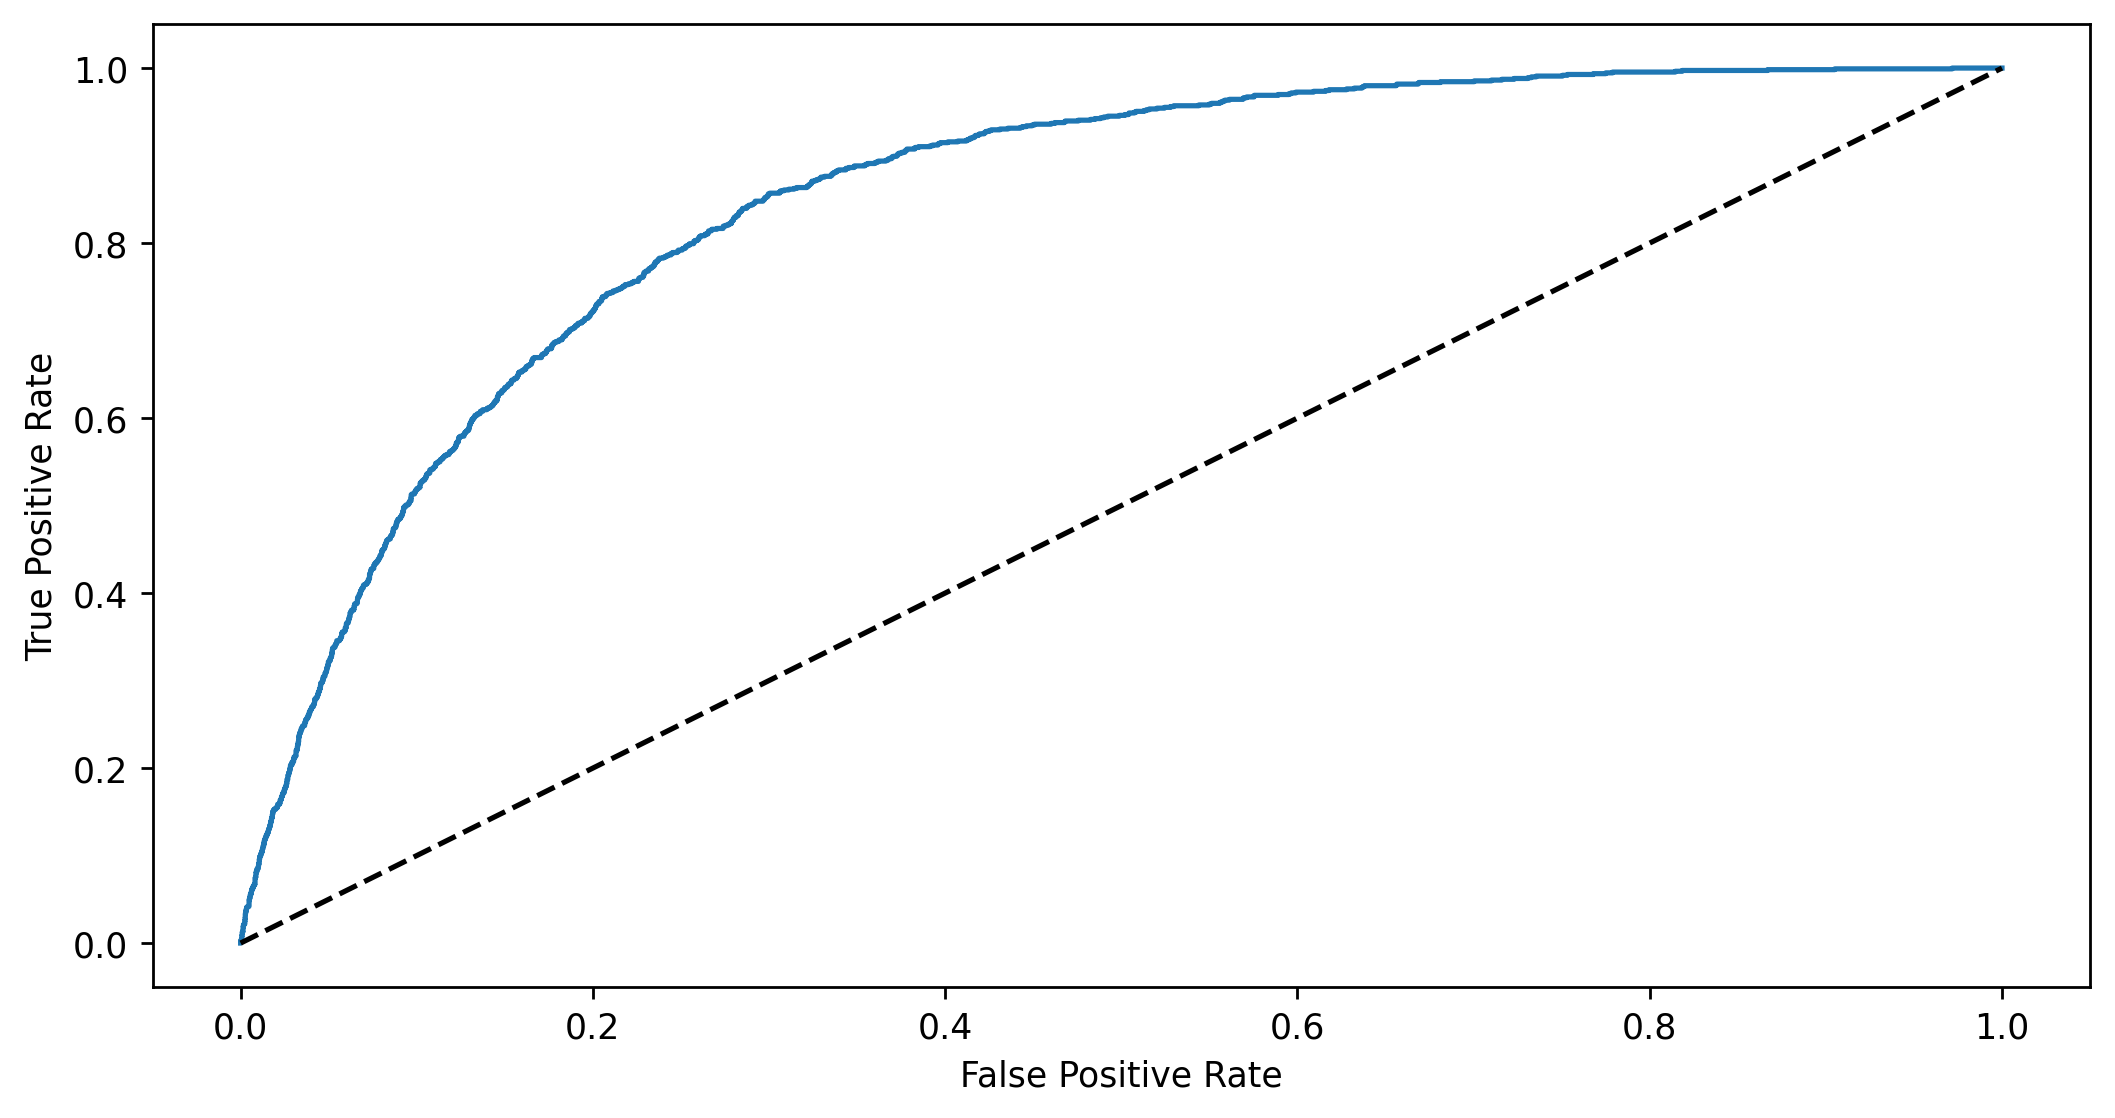

auc: 0.596186


In [133]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

ypred = lg.predict(xtest)
fpr, tpr, thresholds = roc_curve(ytest, lg.predict_proba(xtest)[:,1])
auc=roc_auc_score(ytest,ypred)

plt.plot(fpr, tpr, label='Logistic Regression (area = %0.3f)')
plt.plot([0, 1], [0, 1],'k--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()
print('auc:',np.round(auc,6))